In [1]:
import numpy as np
from matplotlib import pyplot as plt
import json
import codecs

In [2]:
with open('pokedex.json', encoding='latin1') as file:
    pokedex = json.load(file)
with open('moves.json') as file:
    moves = json.load(file)
with open('learnsets.json') as file:
    learnsets = json.load(file)

In [3]:
len(pokedex)
print(list(pokedex.keys())[:20])

['bulbasaur', 'ivysaur', 'venusaur', 'venusaurmega', 'venusaurgmax', 'charmander', 'charmeleon', 'charizard', 'charizardmegax', 'charizardmegay', 'charizardgmax', 'squirtle', 'wartortle', 'blastoise', 'blastoisemega', 'blastoisegmax', 'caterpie', 'metapod', 'butterfree', 'butterfreegmax']


In [4]:
dexit = [p for p in pokedex if "isNonstandard" not in pokedex[p]]
print(len(dexit))
exclude = [p for p in dexit if "tier" not in pokedex[p]]
print(len(exclude))

valid_pokemon = [p for p in dexit if "tier" in pokedex[p]]

770
14


In [5]:
joined = [p for p in valid_pokemon if p in learnsets]
missing = [p for p in valid_pokemon if p not in learnsets]
print(len(missing))
print(missing)

24
['basculinbluestriped', 'pumpkaboosmall', 'pumpkaboolarge', 'gourgeistsmall', 'gourgeistlarge', 'gourgeistsuper', 'zygardecomplete', 'silvallybug', 'silvallydark', 'silvallydragon', 'silvallyelectric', 'silvallyfairy', 'silvallyfighting', 'silvallyfire', 'silvallyflying', 'silvallyghost', 'silvallygrass', 'silvallyground', 'silvallyice', 'silvallypoison', 'silvallypsychic', 'silvallyrock', 'silvallysteel', 'silvallywater']


In [6]:
def match_till(s1,s2):
    for i in range(min(len(s1),len(s2))):
        if s1[i] != s2[i]:
            return i
    return i
for p in missing:
    print(p,'\t',sorted(joined, key=lambda x: -match_till(p,x))[:3])

basculinbluestriped 	 ['basculin', 'barboach', 'baltoy']
pumpkaboosmall 	 ['pumpkaboosuper', 'pumpkaboo', 'pupitar']
pumpkaboolarge 	 ['pumpkaboosuper', 'pumpkaboo', 'pupitar']
gourgeistsmall 	 ['gourgeist', 'golbat', 'golduck']
gourgeistlarge 	 ['gourgeist', 'golbat', 'golduck']
gourgeistsuper 	 ['gourgeist', 'golbat', 'golduck']
zygardecomplete 	 ['zygarde10', 'zygarde', 'zubat']
silvallybug 	 ['silvally', 'silicobra', 'sigilyph']
silvallydark 	 ['silvally', 'silicobra', 'sigilyph']
silvallydragon 	 ['silvally', 'silicobra', 'sigilyph']
silvallyelectric 	 ['silvally', 'silicobra', 'sigilyph']
silvallyfairy 	 ['silvally', 'silicobra', 'sigilyph']
silvallyfighting 	 ['silvally', 'silicobra', 'sigilyph']
silvallyfire 	 ['silvally', 'silicobra', 'sigilyph']
silvallyflying 	 ['silvally', 'silicobra', 'sigilyph']
silvallyghost 	 ['silvally', 'silicobra', 'sigilyph']
silvallygrass 	 ['silvally', 'silicobra', 'sigilyph']
silvallyground 	 ['silvally', 'silicobra', 'sigilyph']
silvallyice 	 ['

In [7]:
join_dict = {p:p for p in joined}
join_dict['pumpkaboosmall'] = 'pumpkaboo'
join_dict['pumpkaboolarge'] = 'pumpkaboo'
join_dict['gourgeistsmall'] = 'gourgeist'
join_dict['gourgeistlarge'] = 'gourgeist'
join_dict['gourgeistsuper'] = 'gourgeist'
join_dict['zygardecomplete'] = 'zygarde'
# we will need to handle silvally, arceus, and genesect separately
join_dict.pop('genesectdouse')
join_dict.pop('genesectshock')
join_dict.pop('genesectburn')
join_dict.pop('genesectchill')



'genesectchill'

In [8]:
learnsets['giratinaorigin'] = learnsets['giratina']
learnsets['tornadustherian'] = learnsets['tornadus']
learnsets['thundurustherian'] = learnsets['thundurus']
learnsets['landorustherian'] = learnsets['landorus']

In [9]:
print(len(moves))
movelist = list({ move for p in join_dict.values() for move, gens in learnsets[p]['learnset'].items() if sum(g[0] == '8' for g in gens) > 0 })
print(len(movelist))

859
666


In [10]:
print([p for p in join_dict if 'learnset' not in learnsets[join_dict[p]]])

[]


In [11]:
tokens = { t for p in join_dict for move in learnsets[join_dict[p]]['learnset'] for t in learnsets[join_dict[p]]['learnset'][move]}
print(tokens)

{'5S29', '3L30', '7L43', '3L49', '8L58', '7L12', '7L86', '4L39', '8L10', '7L30', '7L33', '3L46', '4L26', '7L48', '3L16', '4L67', '6L39', '6R', '5S1', '7L97', '7S23', '4L32', '8L82', '4L81', '8L41', '3L17', '4L17', '4L12', '3L40', '6L51', '4L10', '4L43', '5S2', '3L42', '5L9', '4L40', '3L75', '3L44', '3L93', '4L47', '8M', '6S17', '4L63', '5L79', '8L6', '5L18', '7L74', '5L85', '5L71', '7S4', '8L14', '5L99', '3L12', '6L59', '5D', '4L54', '4L62', '7L22', '5S23', '5L29', '4S13', '6L67', '8L51', '5S26', '5L23', '5L96', '5L61', '7S43', '5L5', '4S3', '7L85', '5L78', '7L15', '6L82', '5L90', '5L86', '6S18', '8L75', '6S1', '7L78', '4L28', '5L43', '7L24', '7L49', '5L63', '3L70', '5E', '3S9', '7R', '3L99', '6L77', '4L65', '7L79', '6L85', '5L2', '4S5', '3L52', '7L99', '6S20', '8L91', '7L77', '3S0', '8L38', '3L41', '7L59', '4L20', '4L78', '4L85', '8L84', '7L6', '6L5', '6L71', '8L77', '8L20', '5L24', '7L64', '7S47', '8L98', '7L88', '7L14', '8E', '4S19', '7M', '8L43', '4L41', '6L73', '7L16', '5L65', '8L

In [12]:
pokelist = list(join_dict.keys())
abilities = list({ a for p in pokelist for a in pokedex[p]['abilities'].values()})

In [13]:
# Construct the pokemon x attributes matrix
rows = len(join_dict)
# Attributes: 17-bitvector of typing
# 1 bitvector of "has evolution"
# 6 vector of stats
# 243 bitvector of abilities
# 859 bitvector of moves

cols = 18 + 1 + 6 + len(abilities) + len(movelist)
print(rows*cols)
pokemat = np.zeros((rows,cols))

685556


In [14]:
ptypes = sorted("Normal Fighting Flying Poison Ground Rock Bug Ghost Steel Fire Water Grass Electric Psychic Ice Dragon Dark Fairy".split())

In [15]:
for i,p in enumerate(join_dict):
    for t in pokedex[p]['types']:
        pokemat[i,ptypes.index(t)] = 1
    if 'evos' in pokedex[p]:
        pokemat[i,18] = 1
    pokemat[i,19] = pokedex[p]['baseStats']['hp']
    pokemat[i,20] = pokedex[p]['baseStats']['atk']
    pokemat[i,21] = pokedex[p]['baseStats']['def']
    pokemat[i,22] = pokedex[p]['baseStats']['spa']
    pokemat[i,23] = pokedex[p]['baseStats']['spd']
    pokemat[i,24] = pokedex[p]['baseStats']['spe']
    for a in pokedex[p]['abilities'].values():
        pokemat[i,25+abilities.index(a)] = 1
    for m in learnsets[join_dict[p]]['learnset']:
        if max([ s[0] == '8' for s in learnsets[join_dict[p]]['learnset'][m]]) > 0:
            pokemat[i,25+len(abilities)+movelist.index(m)] = 1

In [16]:

# set silvally to be 1/17 each type
pokemat[pokelist.index('silvally'),:18] = 1/18

print(len(abilities))
print(abilities)

243
['Unburden', 'Rain Dish', 'Justified', 'Berserk', 'Magnet Pull', 'Friend Guard', 'Slow Start', 'Clear Body', 'Skill Link', 'Cursed Body', 'Marvel Scale', 'Forewarn', 'Multiscale', 'Stall', 'Prism Armor', 'Gulp Missile', 'Shell Armor', 'Filter', 'Anger Point', 'Hunger Switch', 'Rivalry', 'Intrepid Sword', 'Klutz', 'Psychic Surge', 'Pressure', 'Limber', 'Chlorophyll', 'Poison Touch', 'Unnerve', 'Solid Rock', 'Rock Head', 'Insomnia', 'Motor Drive', 'Strong Jaw', 'Shadow Shield', 'Tangling Hair', 'Rattled', 'Snow Cloak', 'Fur Coat', 'Teravolt', 'Quick Draw', 'Analytic', 'Soul-Heart', 'Thick Fat', 'Stench', 'Torrent', 'Gale Wings', 'Sand Force', 'White Smoke', 'Wonder Guard', 'Emergency Exit', 'Beast Boost', 'Tinted Lens', 'Pixilate', 'Pastel Veil', 'Effect Spore', 'As One (Spectrier)', 'Zen Mode', 'Static', 'No Guard', 'Snow Warning', 'Weak Armor', 'Solar Power', 'Download', 'Receiver', 'Natural Cure', 'Soundproof', 'Steam Engine', 'Water Bubble', 'Sand Spit', 'Synchronize', 'Lightning

In [17]:
# Optional: normalize columns
print(pokemat.shape)
print(len(abilities))
print(len(movelist))



(734, 934)
243
666


In [18]:
# Analysis 1: Do PCA on this dataset
pokemean = np.mean(pokemat, axis=0)
pokemat_c = pokemat - pokemean
stds = [np.std(pokemat_c[:,:18])] \
    + [np.std(pokemat_c[:,i]) for i in range(18,25)] \
    + [np.std(pokemat_c[:,25:25+len(abilities)]), np.std(pokemat_c[:,25+len(abilities):25+len(abilities)+len(movelist)])]
pokevar = np.zeros(pokemat.shape[1])
pokevar[:18] = stds[0]
pokevar[18:25] = stds[1:8]
pokevar[25:25+len(abilities)] = stds[-2]
pokevar[25+len(abilities):25+len(abilities)+len(movelist)] = stds[-1]

pokemat_pca = (pokemat_c / pokevar)
u,s,vt = np.linalg.svd(pokemat_pca, full_matrices=False)

In [19]:
print(np.std(pokemat_pca[:,0]))
print(np.std(pokemat_pca[:,10]))
print(np.std(pokemat_pca[:,20]))
print(np.std(pokemat_pca[:,30]))
print(pokevar[15:25])
print(pokevar[-5:])
print(stds)

0.8939780715775708
1.0104316941151243
1.0
0.8424438351780776
[ 0.27918997  0.27918997  0.27918997  0.49327268 28.1803832  30.68745214
 30.75415246 30.84858524 27.6720784  29.32135864]
[0.2345186 0.2345186 0.2345186 0.2345186 0.2345186]
[0.2791899701791386, 0.49327268305330835, 28.180383204981606, 30.68745214465903, 30.75415245854475, 30.84858524287952, 27.672078401116096, 29.321358639702883, 0.0976363981775196, 0.234518599713287]


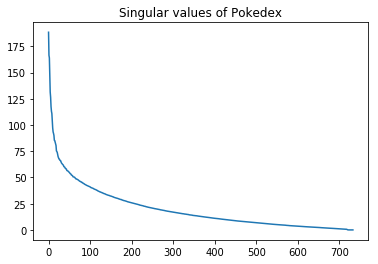

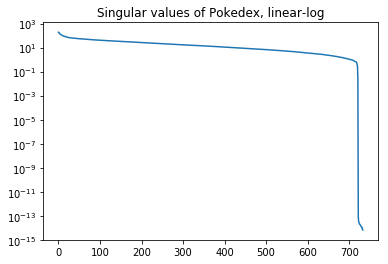

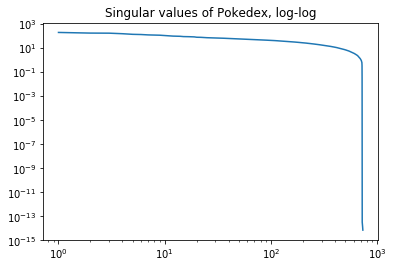

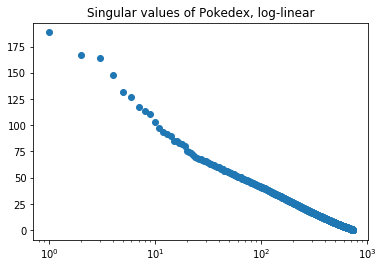

In [20]:
plt.plot(s)
plt.title('Singular values of Pokedex')
plt.show()

plt.plot(s)
plt.title('Singular values of Pokedex, linear-log')
plt.yscale('log')
plt.show()

plt.plot(range(1,len(s)+1), s)
plt.title('Singular values of Pokedex, log-log')
plt.yscale('log')
plt.xscale('log')
plt.show()

plt.scatter(range(1,len(s)+1), s)
plt.title('Singular values of Pokedex, log-linear')
plt.xscale('log')
plt.show()

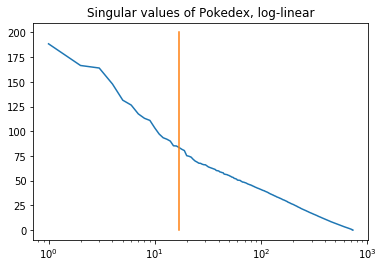

In [21]:
plt.plot(range(1,len(s)+1), s)
plt.plot([17,17],[0,200])
plt.title('Singular values of Pokedex, log-linear')
plt.xscale('log')
plt.show()

In [22]:
def poke_decode(l):
    print('Types')
    tlist = sorted(enumerate(ptypes), key=lambda x: l[x[0]])
    for i,t in tlist[:3]:
        print('\t',t,': ',l[i])
    print('\t...')
    for i,t in tlist[-3:]:
        print('\t',t,': ',l[i])
    print('Evo: ', l[18])
    print('Stats')
    print('\tHP:  ', l[19])
    print('\tAtk: ', l[20])
    print('\tDef: ', l[21])
    print('\tSpA: ', l[22])
    print('\tSpD: ', l[23])
    print('\tSpe: ', l[24])
    print('Abilities')
    alist = sorted(enumerate(abilities), key=lambda x: l[25+x[0]])
    for i,a in alist[:5]:
        print('\t',a,': ',l[25+i])
    print('\t...')
    for i,a in alist[-5:]:
        print('\t',a,': ',l[25+i])
    print('Moves')
    mlist = sorted(enumerate(movelist), key=lambda x: l[25+len(abilities) + x[0]])
    for i,m in mlist[:5]:
        print('\t',m,': ',l[25+len(abilities)+i])
    print('\t...')
    for i,m in mlist[-5:]:
        print('\t',m,': ',l[25+len(abilities)+i])
        

In [23]:
poke_decode(pokemean)

Types
	 Bug :  0.06683318195579777
	 Fire :  0.06819557977596125
	 Ice :  0.06819557977596125
	...
	 Grass :  0.10361792310021194
	 Psychic :  0.12132909476233728
	 Water :  0.151301846805934
Evo:  0.41825613079019075
Stats
	HP:   70.53950953678473
	Atk:  78.54087193460491
	Def:  75.2574931880109
	SpA:  71.77929155313352
	SpD:  72.6008174386921
	Spe:  67.36784741144415
Abilities
	 Slow Start :  0.0013623978201634877
	 Stall :  0.0013623978201634877
	 Gulp Missile :  0.0013623978201634877
	 Hunger Switch :  0.0013623978201634877
	 Shadow Shield :  0.0013623978201634877
	...
	 Pressure :  0.035422343324250684
	 Sturdy :  0.03814713896457766
	 Levitate :  0.04087193460490463
	 Inner Focus :  0.043596730245231606
	 Swift Swim :  0.04632152588555858
Moves
	 diamondstorm :  0.0013623978201634877
	 pyroball :  0.0013623978201634877
	 milkdrink :  0.0013623978201634877
	 clangingscales :  0.0013623978201634877
	 photongeyser :  0.0013623978201634877
	...
	 protect :  0.9686648501362398
	 rest 

In [24]:
print(u.shape)
print(vt.shape)

(734, 734)
(734, 934)


In [25]:
pokemean[:18]

array([0.06683318, 0.06955798, 0.08454435, 0.08181956, 0.07364517,
       0.06955798, 0.06819558, 0.09953073, 0.07909476, 0.10361792,
       0.08726915, 0.06819558, 0.08863155, 0.07500757, 0.12132909,
       0.07636997, 0.08045716, 0.15130185])

In [26]:
appx = (u[:,[0]] *s[0]) @ vt[[0]]
1-np.linalg.norm(appx-pokemat_pca)**2 / np.linalg.norm(pokemat_pca)**2
1-np.linalg.norm(appx*pokevar-pokemat_c)**2 / np.linalg.norm(pokemat_c)**2

0.05813245908155951

In [27]:
for i in range(10):
    print('% Variance: ', 100 * s[i]**2 / np.square(s).sum())
    poke_decode(vt[i]*pokevar*np.sqrt(s[i]) )
    print('\n------\n')

% Variance:  5.181875027842888
Types
	 Water :  -0.18987909173826445
	 Ground :  -0.1889100082674146
	 Rock :  -0.16620060904173997
	...
	 Grass :  0.14357983038792835
	 Fairy :  0.16249899005605414
	 Psychic :  0.3538088234870625
Evo:  0.033271335123194044
Stats
	HP:   -7.860016871684885
	Atk:  -24.12431956744062
	Def:  -13.478931636881585
	SpA:  16.33483090878631
	SpD:  8.361316088102464
	Spe:  5.252660680431026
Abilities
	 Swift Swim :  -0.08272842813575053
	 Sturdy :  -0.0710008578386592
	 Rock Head :  -0.06800919506498912
	 Sheer Force :  -0.05859875911950867
	 Intimidate :  -0.04534569733171547
	...
	 Magic Guard :  0.05025637157900074
	 Levitate :  0.05894101037155492
	 Telepathy :  0.06865224472219315
	 Frisk :  0.07483617882401232
	 Synchronize :  0.08814795486720622
Moves
	 rocktomb :  -0.5612729306056315
	 rockslide :  -0.5170019344228367
	 bulldoze :  -0.49021441558417295
	 earthquake :  -0.48358273731092194
	 stoneedge :  -0.4212129157728045
	...
	 calmmind :  0.4411669907

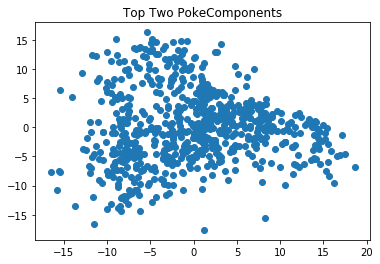

In [28]:
lowdim = u[:,:2] * s[:2]
plt.scatter(*lowdim.T)
plt.title('Top Two PokeComponents')
plt.show()

In [29]:
ptcolors = {'Bug':'greenyellow',
 'Dark': 'black',
 'Dragon': 'blueviolet',
 'Electric': 'yellow',
 'Fairy': 'fuchsia',
 'Fighting': 'darkred',
 'Fire': 'orangered',
 'Flying': 'turquoise',
 'Ghost': 'dimgrey',
 'Grass': 'green',
 'Ground': 'goldenrod',
 'Ice': 'lightblue',
 'Normal': 'lightgrey',
 'Poison': 'darkmagenta',
 'Psychic': 'lightpink',
 'Rock': 'sienna', 
 'Steel': 'steelblue',
 'Water': 'darkblue'}

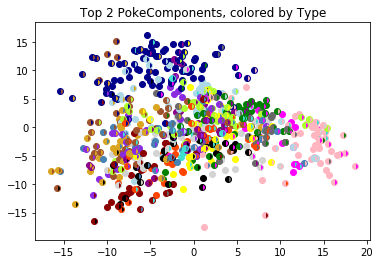

In [30]:
for i,p in enumerate(join_dict):
    if len(pokedex[p]['types']) == 1:
        plt.scatter(*lowdim[i], color=ptcolors[pokedex[p]['types'][0]])
    else:
        plt.plot(*lowdim[i], color=ptcolors[pokedex[p]['types'][0]],linestyle='', marker='o', fillstyle='left',  markerfacecoloralt=ptcolors[pokedex[p]['types'][1]])
plt.title('Top 2 PokeComponents, colored by Type')
plt.show()

In [31]:
selection = np.random.choice(len(join_dict),50,replace=False)

In [32]:
print(len(join_dict))
print(len(pokelist))

734
734


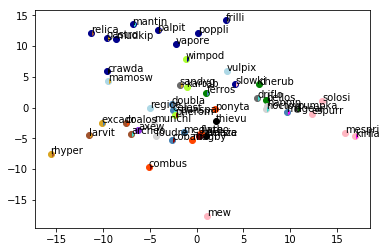

In [33]:
for i in selection:
    p = pokelist[i]
    if len(pokedex[p]['types']) == 1:
        plt.scatter(*lowdim[i], color=ptcolors[pokedex[p]['types'][0]])
    else:
        plt.plot(*lowdim[i], c=ptcolors[pokedex[p]['types'][0]],linestyle='', fillstyle='left',
                 marker='o', markerfacecoloralt=ptcolors[pokedex[p]['types'][1]])
    plt.annotate(p[:6],lowdim[i])
plt.show()

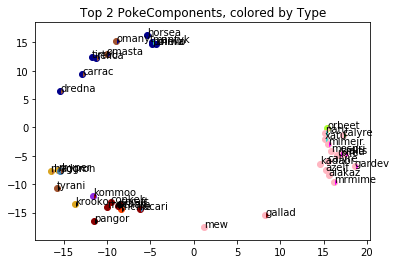

In [34]:
selection = np.argsort(-np.linalg.norm(lowdim,axis=1))[:40]
for i in selection:
    p = pokelist[i]
    if len(pokedex[p]['types']) == 1:
        plt.scatter(*lowdim[i], color=ptcolors[pokedex[p]['types'][0]])
    else:
        plt.plot(*lowdim[i], c=ptcolors[pokedex[p]['types'][0]],linestyle='', fillstyle='left',
                 marker='o', markerfacecoloralt=ptcolors[pokedex[p]['types'][1]])
    plt.annotate(p[:6],lowdim[i])
plt.title('Top 2 PokeComponents, colored by Type')
plt.show()


In [35]:
len(ptypes)

18

In [36]:
# Method 2: KMeans Clustering
from sklearn.cluster import KMeans

In [37]:
km = KMeans(10)
km.fit(pokemat_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [38]:
for i,c in enumerate(km.cluster_centers_):
    print('Cluster size: ', sum(km.labels_ == i))
    poke_decode(c*pokevar + pokemean)
    print('-----')

Cluster size:  70
Types
	 Grass :  -2.7755575615628914e-17
	 Electric :  2.7755575615628914e-17
	 Psychic :  0.014285714285714346
	...
	 Ground :  0.14285714285714288
	 Normal :  0.21428571428571414
	 Fighting :  0.5285714285714285
Evo:  0.2857142857142857
Stats
	HP:   82.42857142857142
	Atk:  102.81428571428572
	Def:  80.55714285714286
	SpA:  57.78571428571429
	SpD:  71.2
	Spe:  66.52857142857142
Abilities
	 Water Absorb :  -6.245004513516506e-17
	 Rattled :  -2.2551405187698492e-17
	 Ice Body :  -2.0816681711721685e-17
	 Telepathy :  -1.3877787807814457e-17
	 Serene Grace :  -1.214306433183765e-17
	...
	 Reckless :  0.10000000000000006
	 Iron Fist :  0.11428571428571417
	 Sheer Force :  0.11428571428571443
	 Inner Focus :  0.14285714285714282
	 Guts :  0.14285714285714296
Moves
	 waterpulse :  -1.3877787807814457e-16
	 watergun :  -1.1102230246251565e-16
	 absorb :  -1.1102230246251565e-16
	 charge :  -8.326672684688674e-17
	 gust :  -8.326672684688674e-17
	...
	 facade :  1.0
	 subs

	 Pickup :  -1.3877787807814457e-17
	 Prankster :  -1.0408340855860843e-17
	 Telepathy :  -1.0408340855860843e-17
	 Thick Fat :  -6.938893903907228e-18
	 Static :  -6.938893903907228e-18
	...
	 Magic Guard :  0.16666666666666674
	 Competitive :  0.1666666666666668
	 Friend Guard :  0.2777777777777776
	 Serene Grace :  0.33333333333333326
	 Cute Charm :  0.5555555555555557
Moves
	 ironhead :  -5.551115123125783e-17
	 sludgebomb :  -5.551115123125783e-17
	 gigadrain :  -5.551115123125783e-17
	 outrage :  -5.551115123125783e-17
	 dragonclaw :  -4.163336342344337e-17
	...
	 snore :  1.0
	 raindance :  1.0
	 endure :  1.0
	 sleeptalk :  1.0
	 helpinghand :  1.0
-----
Cluster size:  76
Types
	 Poison :  4.163336342344337e-17
	 Electric :  6.938893903907228e-17
	 Water :  1.6653345369377348e-16
	...
	 Normal :  0.07894736842105265
	 Fairy :  0.21052631578947373
	 Psychic :  0.8552631578947363
Evo:  0.34210526315789475
Stats
	HP:   69.98684210526315
	Atk:  66.11842105263158
	Def:  73.131578947

In [39]:
# What if we do this to the tf-idf?
pokemat_tfidf1 = pokemat / pokemat.sum(0)
pokemat_tfidf1[np.isnan(pokemat_tfidf1)] = 0
km = KMeans(10)
km.fit(pokemat_tfidf1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [40]:
for i,c in enumerate(km.cluster_centers_):
    print('Cluster size: ', sum(km.labels_ == i))
    poke_decode(c)
    print('-----')

Cluster size:  2
Types
	 Bug :  0.0
	 Dark :  0.0
	 Dragon :  0.0
	...
	 Water :  0.0
	 Electric :  0.016651248843663275
	 Poison :  0.018163471241170535
Evo:  0.0
Stats
	HP:   0.0014485475896168108
	Atk:  0.0016999427570296103
	Def:  0.0012672206231104835
	SpA:  0.0021637626693998407
	SpD:  0.0013135919232862318
	Spe:  0.0015167448632907297
Abilities
	 Unburden :  0.0
	 Rain Dish :  0.0
	 Justified :  0.0
	 Berserk :  0.0
	 Magnet Pull :  0.0
	...
	 Cloud Nine :  0.0
	 Technician :  0.058823529411764705
	 Minus :  0.08333333333333334
	 Plus :  0.10000000000000002
	 Punk Rock :  0.5
Moves
	 forestscurse :  0.0
	 endeavor :  0.0
	 zenheadbutt :  0.0
	 detect :  0.0
	 tailwind :  0.0
	...
	 shiftgear :  0.08333333333333334
	 tearfullook :  0.09090909090909091
	 magneticflux :  0.125
	 boomburst :  0.125
	 overdrive :  0.5
-----
Cluster size:  724
Types
	 Poison :  0.0013045587079293772
	 Electric :  0.0013109408620011135
	 Bug :  0.0013514950914449114
	...
	 Ground :  0.00138001753772287

In [41]:
# Ok, let's do LDA on the move matrix
valid_moves = {m: v for m,v in moves.items() if m in movelist}
print(len(valid_moves))

666


In [42]:
valid_moves[movelist[0]]

{'accuracy': 100,
 'basePower': 0,
 'category': 'Status',
 'contestType': 'Clever',
 'desc': 'Causes the Grass type to be added to the target, effectively making it have two or three types. Fails if the target is already a Grass type. If Trick-or-Treat adds a type to the target, it replaces the type added by this move and vice versa.',
 'flags': {'mirror': 1, 'mystery': 1, 'protect': 1, 'reflectable': 1},
 'name': "Forest's Curse",
 'num': 571,
 'pp': 20,
 'priority': 0,
 'secondary': None,
 'shortDesc': "Adds Grass to the target's type(s).",
 'target': 'normal',
 'type': 'Grass',
 'zMove': {'boost': {'atk': 1, 'def': 1, 'spa': 1, 'spd': 1, 'spe': 1}}}

In [43]:
import re

In [44]:
move_chars = {}
for m, data in valid_moves.items():
    for ch in data['desc']:
        c = ch.lower()
        if c not in move_chars:
            move_chars[c] = m

In [45]:
print(move_chars)
print(sorted(move_chars))

{'t': 'absorb', 'h': 'absorb', 'e': 'absorb', ' ': 'absorb', 'u': 'absorb', 's': 'absorb', 'r': 'absorb', 'c': 'absorb', 'o': 'absorb', 'v': 'absorb', '1': 'absorb', '/': 'absorb', '2': 'absorb', 'p': 'absorb', 'l': 'absorb', 'b': 'absorb', 'y': 'absorb', 'a': 'absorb', 'g': 'absorb', ',': 'absorb', 'n': 'absorb', 'd': 'absorb', 'f': 'absorb', '.': 'absorb', 'i': 'absorb', '3': 'absorb', 'x': 'absorb', 'm': 'absorb', 'w': 'absorb', '0': 'acid', '%': 'acid', "'": 'acid', '6': 'acupressure', 'j': 'acupressure', 'k': 'aerialace', '-': 'anchorshot', '5': 'armthrust', ';': 'auroraveil', '8': 'auroraveil', 'q': 'banefulbunker', '+': 'beatup', '(': 'beatup', ')': 'beatup', 'z': 'blizzard', '7': 'chargebeam', '*': 'crushgrip', '4': 'curse', '9': 'flail'}
[' ', '%', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ';', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [46]:
sorted(move_chars.items(), key=lambda x: x[0])

[(' ', 'absorb'),
 ('%', 'acid'),
 ("'", 'acid'),
 ('(', 'beatup'),
 (')', 'beatup'),
 ('*', 'crushgrip'),
 ('+', 'beatup'),
 (',', 'absorb'),
 ('-', 'anchorshot'),
 ('.', 'absorb'),
 ('/', 'absorb'),
 ('0', 'acid'),
 ('1', 'absorb'),
 ('2', 'absorb'),
 ('3', 'absorb'),
 ('4', 'curse'),
 ('5', 'armthrust'),
 ('6', 'acupressure'),
 ('7', 'chargebeam'),
 ('8', 'auroraveil'),
 ('9', 'flail'),
 (';', 'auroraveil'),
 ('a', 'absorb'),
 ('b', 'absorb'),
 ('c', 'absorb'),
 ('d', 'absorb'),
 ('e', 'absorb'),
 ('f', 'absorb'),
 ('g', 'absorb'),
 ('h', 'absorb'),
 ('i', 'absorb'),
 ('j', 'acupressure'),
 ('k', 'aerialace'),
 ('l', 'absorb'),
 ('m', 'absorb'),
 ('n', 'absorb'),
 ('o', 'absorb'),
 ('p', 'absorb'),
 ('q', 'banefulbunker'),
 ('r', 'absorb'),
 ('s', 'absorb'),
 ('t', 'absorb'),
 ('u', 'absorb'),
 ('v', 'absorb'),
 ('w', 'absorb'),
 ('x', 'absorb'),
 ('y', 'absorb'),
 ('z', 'blizzard')]

In [47]:
len(move_chars)

48

In [48]:
st = 'Has a 10% chance to burn the target. If the target lost HP, the user takes recoil damage equal to 33% the HP lost by the target, rounded half up, but not less than 1 HP.'
st2 = re.sub(r'[\',.]','',st.lower())
st3 = re.findall(r'[^ ]+', st2)

In [49]:
st3

['has',
 'a',
 '10%',
 'chance',
 'to',
 'burn',
 'the',
 'target',
 'if',
 'the',
 'target',
 'lost',
 'hp',
 'the',
 'user',
 'takes',
 'recoil',
 'damage',
 'equal',
 'to',
 '33%',
 'the',
 'hp',
 'lost',
 'by',
 'the',
 'target',
 'rounded',
 'half',
 'up',
 'but',
 'not',
 'less',
 'than',
 '1',
 'hp']

In [107]:
move_vocab = {}
for m, data in valid_moves.items():
    st2 = re.sub(r'[\',.;:()]','',data['desc'].lower())
    st3 = re.findall(r'[^ ]+', st2)
    for word in st3:
        wd = word.lower()
        move_vocab[wd] = move_vocab.get(wd,0) + 1

In [108]:
len(move_vocab)

1090

In [109]:
wordlist = sorted(move_vocab.items(), key=lambda x: x[1])
print(wordlist[:20])
print('--')
print(wordlist[-20:])
print('--')
print([(w,c) for w,c in wordlist if c > 1][:20])

[('choose', 1), ('anyway', 1), ('positions', 1), ('sap', 1), ('sipper', 1), ('direct', 1), ('pain', 1), ('split', 1), ('genderless', 1), ('dark', 1), ('form', 1), ('considering', 1), ('remove', 1), ('01', 1), ('5+x/10', 1), ('participating', 1), ('come', 1), ('stealing', 1), ('met', 1), ('rest', 1)]
--
[('attack', 176), ('targets', 200), ('turn', 203), ('users', 214), ('chance', 222), ('effect', 232), ('has', 292), ('of', 292), ('by', 333), ('move', 367), ('and', 371), ('this', 390), ('target', 412), ('user', 413), ('to', 452), ('or', 458), ('a', 491), ('is', 632), ('if', 675), ('the', 1942)]
--
[('6', 2), ('makes', 2), ('receive', 2), ('taken', 2), ('drum', 2), ('infatuated', 2), ('unable', 2), ('gender', 2), ('oblivious', 2), ('aroma', 2), ('hangry', 2), ('reduce', 2), ('certain', 2), ('transferred', 2), ('off', 2), ('bug', 2), ('bite', 2), ('pluck', 2), ('then', 2), ('hurricane', 2)]


In [110]:
valid_moves[movelist[0]]

{'accuracy': 100,
 'basePower': 0,
 'category': 'Status',
 'contestType': 'Clever',
 'desc': 'Causes the Grass type to be added to the target, effectively making it have two or three types. Fails if the target is already a Grass type. If Trick-or-Treat adds a type to the target, it replaces the type added by this move and vice versa.',
 'flags': {'mirror': 1, 'mystery': 1, 'protect': 1, 'reflectable': 1},
 'name': "Forest's Curse",
 'num': 571,
 'pp': 20,
 'priority': 0,
 'secondary': None,
 'shortDesc': "Adds Grass to the target's type(s).",
 'target': 'normal',
 'type': 'Grass',
 'zMove': {'boost': {'atk': 1, 'def': 1, 'spa': 1, 'spd': 1, 'spe': 1}}}

In [111]:
flags = { f for info in valid_moves.values() for f in info.get('flags',[])}
print(flags)

{'sound', 'nonsky', 'gravity', 'distance', 'powder', 'mystery', 'reflectable', 'snatch', 'punch', 'bullet', 'dance', 'contact', 'charge', 'authentic', 'defrost', 'mirror', 'bite', 'recharge', 'protect', 'heal', 'pulse'}


In [112]:
secondary = { f for info in valid_moves.values() if info.get('secondary',None) is not None for f in info['secondary']}
print(secondary)
seconds = { s: [] for s in secondary}
for info in valid_moves.values():
    if info.get('secondary',None) is not None:
        for s,v in info['secondary'].items():
            seconds[s].append(v)

{'dustproof', 'boosts', 'self', 'status', 'volatileStatus', 'chance'}


In [113]:
# What are all the fields?
fields = { k for d in valid_moves.values() for k in d}
print(len(fields))
print(fields)

63
{'pp', 'noMetronome', 'zMove', 'maxMove', 'hasCrashDamage', 'stealsBoosts', 'sideCondition', 'target', 'critRatio', 'ignoreImmunity', 'willCrit', 'weather', 'basePower', 'smartTarget', 'isFutureMove', 'status', 'useSourceDefensiveAsOffensive', 'pressureTarget', 'selfBoost', 'selfdestruct', 'sleepUsable', 'onTryHit', 'slotCondition', 'tracksTarget', 'terrain', 'damage', 'selfSwitch', 'multihit', 'shortDesc', 'category', 'ignoreEvasion', 'ignoreDefensive', 'type', 'stallingMove', 'multiaccuracy', 'thawsTarget', 'priority', 'secondary', 'boosts', 'ignoreAbility', 'onDamagePriority', 'flags', 'num', 'drain', 'mindBlownRecoil', 'breaksProtect', 'defensiveCategory', 'ohko', 'secondaries', 'nonGhostTarget', 'contestType', 'isNonstandard', 'self', 'forceSwitch', 'name', 'recoil', 'accuracy', 'useTargetOffensive', 'heal', 'condition', 'desc', 'volatileStatus', 'pseudoWeather'}


In [114]:
# How many different things can show up in these fields?
def dict_iter(x, basestr=''):
#     print((x,basestr))
    if type(x) is dict:
        for k,v in x.items():
#             print('\t',(k,v))
            for di in dict_iter(v, basestr+str(k)+'; '):
                yield di
    elif type(x) is list:
        for k in x:
            for di in dict_iter(k,basestr):
                yield di
    elif x is None:
        yield basestr            
    elif type(x) is not str:
        yield basestr + str(x)
    else:
        yield basestr + x


In [115]:

field_dict = {f: set() for f in fields if f != 'desc' and f!='shortDesc' and f!='num' and f!='name' and f!='zMove'}
field_count = {f: 0 for f in field_dict}
for info in valid_moves.values():
    for kk,vv in info.items():
        if kk == 'desc' or kk=='shortDesc' or kk=='num' or kk=='name' or kk=='zMove':
            continue
        field_count[kk] += 1            
        for di in dict_iter(vv):
            field_dict[kk].add(di)

In [116]:
[ m for m,v in valid_moves.items() if 'noMetronome' in v]

['metronome']

In [117]:
valid_moves['stickyweb']

{'accuracy': True,
 'basePower': 0,
 'category': 'Status',
 'condition': {},
 'contestType': 'Tough',
 'desc': 'Sets up a hazard on the opposing side of the field, lowering the Speed by 1 stage of each opposing Pokemon that switches in, unless it is a Flying-type Pokemon or has the Levitate Ability. Fails if the effect is already active on the opposing side. Can be removed from the opposing side if any opposing Pokemon uses Rapid Spin or Defog successfully, or is hit by Defog.',
 'flags': {'reflectable': 1},
 'name': 'Sticky Web',
 'num': 564,
 'pp': 20,
 'pressureTarget': 'self',
 'priority': 0,
 'secondary': None,
 'shortDesc': 'Lowers Speed of grounded foes by 1 on switch-in.',
 'sideCondition': 'stickyweb',
 'target': 'foeSide',
 'type': 'Bug',
 'zMove': {'boost': {'spe': 1}}}

In [118]:
xl = [ x for x in dict_iter(valid_moves['stickyweb']['flags'])]

In [119]:
list(xl[0])

['r', 'e', 'f', 'l', 'e', 'c', 't', 'a', 'b', 'l', 'e', ';', ' ', '1']

In [120]:
field_dict

{'accuracy': {'100',
  '30',
  '50',
  '55',
  '60',
  '70',
  '75',
  '80',
  '85',
  '90',
  '95',
  'True'},
 'basePower': {'0',
  '10',
  '100',
  '110',
  '120',
  '125',
  '130',
  '140',
  '15',
  '150',
  '160',
  '18',
  '180',
  '20',
  '200',
  '25',
  '250',
  '30',
  '35',
  '40',
  '45',
  '50',
  '55',
  '60',
  '65',
  '70',
  '75',
  '80',
  '85',
  '90',
  '95'},
 'boosts': {'accuracy; -1',
  'accuracy; 1',
  'atk; -1',
  'atk; -2',
  'atk; 1',
  'atk; 2',
  'def; -1',
  'def; -2',
  'def; 1',
  'def; 2',
  'def; 3',
  'evasion; -2',
  'evasion; 1',
  'evasion; 2',
  'spa; -1',
  'spa; -2',
  'spa; 1',
  'spa; 2',
  'spd; -1',
  'spd; -2',
  'spd; 1',
  'spd; 2',
  'spe; -1',
  'spe; -2',
  'spe; 1',
  'spe; 2'},
 'breaksProtect': {'True'},
 'category': {'Physical', 'Special', 'Status'},
 'condition': {'duration; 1',
  'duration; 2',
  'duration; 3',
  'duration; 4',
  'duration; 5',
  'noCopy; True',
  'onBasePowerPriority; 10',
  'onBasePowerPriority; 6',
  'onBaseP

In [132]:
# How many columns do I need?
fieldlist = [fname for fname,ct in field_count.items() if ct == 1] + [ fname + ': ' + foption if type(foption) is str else fname + ": BLANK" for fname, flist in field_dict.items() if field_count[fname] > 1 for foption in flist ]# + [ fname + ': ABSENT' for fname, ct in field_count.items() if ct > 1]
wordlist = list(move_vocab)

fieldlookup = { j: i for i,j in enumerate(fieldlist)}
wordlookup = { j:i for i,j in enumerate(wordlist)}

m_rows = len(movelist)
m_cols = len(fieldlist) + len(wordlist)
movemat = np.zeros((m_rows, m_cols))
print(movemat.shape)

for i,m in enumerate(movelist):
    for kk,vv in valid_moves[m].items():
        if kk == 'desc' or kk=='shortDesc' or kk=='num' or kk=='name' or kk=='zMove':
            continue
        if field_count[kk] == 1:
            movemat[i, fieldlookup[kk]] = 1
        else:
            for di in dict_iter(vv):
                if type(di) is str:
                    movemat[i, fieldlookup[kk + ': ' + di]] = 1
                else:
                    movemat[i, fieldlookup[kk + ': BLANK']] = 1
    st2 = re.sub(r'[\',.;:()]','',valid_moves[m]['desc'].lower())
    st3 = re.findall(r'[^ ]+', st2)
    for wd in st3:
        movemat[i, len(fieldlist)+wordlookup[wd]] += 1

(666, 1490)


In [133]:
# We could do PCA on this, yolo I guess

In [134]:
movemean = np.mean(movemat, axis=0)
movemat_c = movemat - movemean
blocks = [0]
lastf = ''
for i in range(1,len(fieldlist)):
    if ':' not in fieldlist[i] or (':' in fieldlist[i] and fieldlist[i][:fieldlist[i].index(':')] != lastf):
        blocks.append(i)
    if ':' in fieldlist[i]:
        lastf = fieldlist[i][:fieldlist[i].index(':')]
    else:
        lastf = ''
blocks.append(len(fieldlist))
stds = []
for i in range(1,len(blocks)):
    stds.append(np.std(movemat_c[:,blocks[i-1]:blocks[i]]))
movevar = np.zeros(movemean.shape)
i=0
for j in range(len(fieldlist)):
    if j == blocks[i+1]:
        i+=1
    movevar[j] = stds[i]
movevar[len(fieldlist):] = np.std(movemat_c[:,len(fieldlist):])
movemat_pca = movemat_c / movevar

In [135]:
mu,ms,mvt = np.linalg.svd(movemat_pca, full_matrices=False)

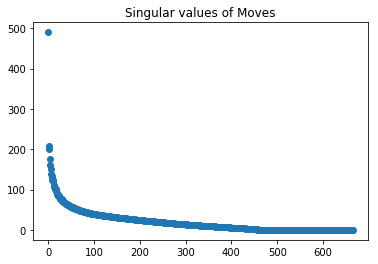

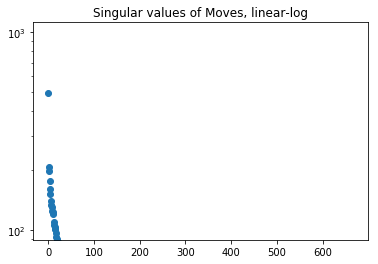

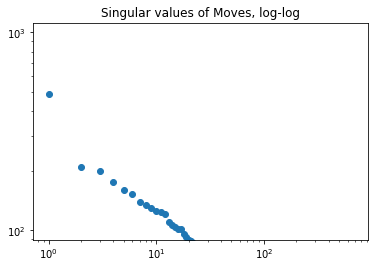

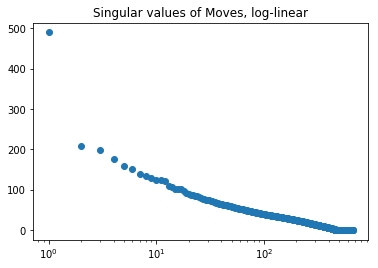

In [136]:
plt.scatter(range(len(ms)), ms)
plt.title('Singular values of Moves')
plt.show()

plt.scatter(range(len(ms)), ms)
plt.title('Singular values of Moves, linear-log')
plt.yscale('log')
plt.show()

plt.scatter(range(1,len(ms)+1), ms)
plt.title('Singular values of Moves, log-log')
plt.yscale('log')
plt.xscale('log')
plt.show()

plt.scatter(range(1,len(ms)+1), ms)
plt.title('Singular values of Moves, log-linear')
plt.xscale('log')
plt.show()

In [137]:
np.cumsum(ms**2)[:20] / (ms**2).sum()

array([0.24203931, 0.28583374, 0.32594868, 0.35710104, 0.38296112,
       0.40626207, 0.42580162, 0.44371808, 0.46076714, 0.47643303,
       0.4918417 , 0.50653654, 0.51878838, 0.53005423, 0.54077152,
       0.55117571, 0.56143843, 0.57075004, 0.57931584, 0.58739774])

In [138]:
list(enumerate(fieldlist))

[(0, 'noMetronome'),
 (1, 'stealsBoosts'),
 (2, 'smartTarget'),
 (3, 'useSourceDefensiveAsOffensive'),
 (4, 'onTryHit'),
 (5, 'tracksTarget'),
 (6, 'onDamagePriority'),
 (7, 'nonGhostTarget'),
 (8, 'useTargetOffensive'),
 (9, 'pp: 40'),
 (10, 'pp: 35'),
 (11, 'pp: 30'),
 (12, 'pp: 25'),
 (13, 'pp: 10'),
 (14, 'pp: 20'),
 (15, 'pp: 5'),
 (16, 'pp: 15'),
 (17, 'maxMove: basePower; 120'),
 (18, 'maxMove: basePower; 80'),
 (19, 'maxMove: basePower; 95'),
 (20, 'maxMove: basePower; 140'),
 (21, 'maxMove: basePower; 100'),
 (22, 'maxMove: basePower; 75'),
 (23, 'maxMove: basePower; 130'),
 (24, 'hasCrashDamage: True'),
 (25, 'sideCondition: lightscreen'),
 (26, 'sideCondition: reflect'),
 (27, 'sideCondition: craftyshield'),
 (28, 'sideCondition: auroraveil'),
 (29, 'sideCondition: tailwind'),
 (30, 'sideCondition: safeguard'),
 (31, 'sideCondition: quickguard'),
 (32, 'sideCondition: wideguard'),
 (33, 'sideCondition: spikes'),
 (34, 'sideCondition: stealthrock'),
 (35, 'sideCondition: mist

In [139]:
def decode_move(m):
    fs = sorted(enumerate(m[:len(fieldlist)]), key=lambda x: x[1])
    important_fields = fs[:5] + fs[-5:]
    
    typing = np.argmax(abs(m[70:88])) + 70
    print('Typing: ', fieldlist[typing], m[typing])
    categ = np.argmax(abs(m[345:348])) + 345
    print('Category: ', fieldlist[categ], m[categ])
    power = np.argmax( abs(m[260:291])) + 260
    print('Power: ', fieldlist[power], m[power])
    acc = np.argmax(abs(m[139:151])) + 139
    print('Accuracy: ', fieldlist[acc], m[acc])
    pp = np.argmax(abs(m[9:17]))+9
    print('PP: ', fieldlist[pp], m[pp])
    target = np.argmax(abs(m[20:34]))+20
    print('Target: ', fieldlist[target], m[target])
    priority = np.argmax(abs(m[34:46])) + 34
    print('Priority: ', fieldlist[priority], m[priority])
    vstatus = np.argmax(abs(m[93:133])) + 93
    print('Volatile effect: ', fieldlist[vstatus], m[vstatus])
    boost = np.argmax( abs(m[373:399])) + 373
    print('Boost: ', fieldlist[boost], m[boost])
    print('\nOther fields:')
    print(important_fields)
    for f in important_fields:
        print(fieldlist[f[0]],': ', f[1])
    
    

In [140]:
decode_move(movemean)

Typing:  basePower: 0 0.3768768768768769
Category:  condition: onSideResidualSubOrder; 3 0.0015015015015015015
Power:  accuracy: 100 0.5195195195195195
Accuracy:  priority: 0 0.933933933933934
PP:  pp: 10 0.33783783783783783
Target:  maxMove: basePower; 130 0.042042042042042045
Priority:  target: normal 0.6726726726726727
Volatile effect:  category: Physical 0.4039039039039039
Boost:  volatileStatus: protect 0.003003003003003003

Other fields:
[(0, 0.0015015015015015015), (1, 0.0015015015015015015), (2, 0.0015015015015015015), (3, 0.0015015015015015015), (4, 0.0015015015015015015), (41, 0.6726726726726727), (158, 0.7627627627627628), (220, 0.7807807807807807), (228, 0.7852852852852853), (147, 0.933933933933934)]
noMetronome :  0.0015015015015015015
stealsBoosts :  0.0015015015015015015
smartTarget :  0.0015015015015015015
useSourceDefensiveAsOffensive :  0.0015015015015015015
onTryHit :  0.0015015015015015015
target: normal :  0.6726726726726727
secondary:  :  0.7627627627627628
flags:

In [141]:
decode_move(mvt[0]*np.sqrt(ms[0])*movevar + movemean)

Typing:  basePower: 0 0.2577083794953063
Category:  condition: onSideResidualSubOrder; 2 -0.0011653305577887887
Power:  accuracy: 100 0.5769768013837655
Accuracy:  priority: 0 0.9774084515572357
PP:  pp: 10 0.24586537733227343
Target:  maxMove: basePower; 130 0.028095092035233405
Priority:  target: normal 0.7322295888195832
Volatile effect:  category: Physical 0.4547128203928231
Boost:  volatileStatus: smackdown -0.00589164587754654

Other fields:
[(355, -0.0393283800983412), (46, -0.018799778752030094), (287, -0.017260409060968377), (86, -0.014656460352040523), (254, -0.014498051875491209), (158, 0.6205163415126707), (41, 0.7322295888195832), (228, 0.8915403196929115), (220, 0.8982228081221951), (147, 0.9774084515572357)]
volatileStatus: partiallytrapped :  -0.0393283800983412
target: randomNormal :  -0.018799778752030094
condition: duration; 1 :  -0.017260409060968377
basePower: 35 :  -0.014656460352040523
self: volatileStatus; lockedmove :  -0.014498051875491209
secondary:  :  0.620

In [142]:
decode_move(mvt[0])

Typing:  basePower: 0 -0.03283316753404899
Category:  condition: onSideResidualSubOrder; 2 -0.0019663452461209366
Power:  condition: duration; 1 -0.03376172842994715
Accuracy:  priority: 0 0.01908232561089216
PP:  pp: 10 -0.01327843138173875
Target:  maxMove: basePower; 130 -0.006737223828827368
Priority:  target: normal 0.013895795241974615
Volatile effect:  category: Status -0.00940962416259755
Boost:  volatileStatus: smackdown -0.008814986298924769

Other fields:
[(355, -0.05385668279821898), (158, -0.04373205314527656), (287, -0.03376172842994715), (74, -0.03283316753404899), (312, -0.019553054020138867), (41, 0.013895795241974615), (184, 0.014195381310331493), (147, 0.01908232561089216), (228, 0.019794243224853816), (220, 0.02187826738729135)]
volatileStatus: partiallytrapped :  -0.05385668279821898
secondary:  :  -0.04373205314527656
condition: duration; 1 :  -0.03376172842994715
basePower: 0 :  -0.03283316753404899
condition: noCopy; True :  -0.019553054020138867
target: normal 

In [143]:
cmoves = [ (i,move, mvt[0] @ movemat_pca[i]) for i,move in enumerate(movelist)]
scmoves = sorted(cmoves, key=lambda x: x[2])
print(scmoves[:5])
print(scmoves[-5:])

[(326, 'substitute', -72.8978401234004), (578, 'thrash', -68.74151119055232), (614, 'petaldance', -68.73020447347265), (616, 'outrage', -68.69655628466731), (204, 'fling', -60.04602163442256)]
[(358, 'xscissor', 17.145025677440977), (576, 'branchpoke', 17.147297710623256), (91, 'dragonclaw', 17.14836565433074), (385, 'precipiceblades', 17.17961311409846), (178, 'originpulse', 17.238776800185143)]


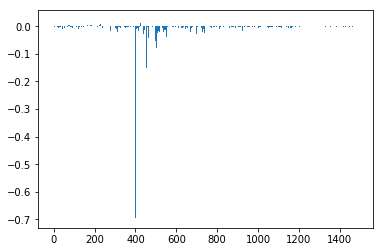

In [144]:
plt.bar(range(len(mvt[0])), mvt[0])
plt.show()

In [145]:
np.argsort(-abs(mvt[0]))[:5] - len(fieldlist)

array([ 0, 11, 14, 57,  1], dtype=int64)

In [146]:
for i in np.argsort(-abs(mvt[0]))[:5] - len(fieldlist):
    print(wordlist[i], '\t', mvt[0,i+len(fieldlist)])

the 	 -0.694388280897105
if 	 -0.28598580648705696
is 	 -0.27375229125793027
or 	 -0.26693893490815335
user 	 -0.18920953727966233


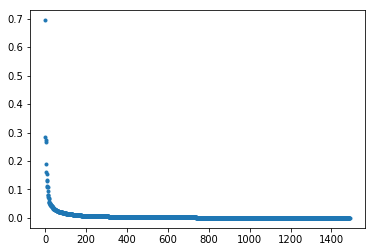

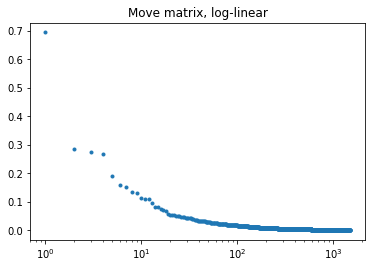

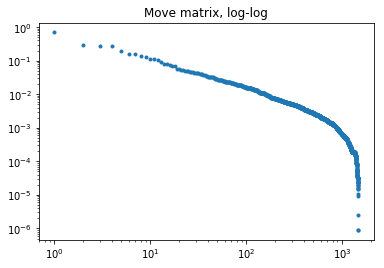

In [147]:
plt.plot(range(len(mvt[0])), sorted(abs(mvt[0]),reverse=True), '.')
plt.show()

plt.plot(range(1,1+len(mvt[0])), sorted(abs(mvt[0]),reverse=True), '.')
# plt.yscale('log')
plt.xscale('log')
plt.title('Move matrix, log-linear')
plt.show()

plt.plot(range(1,1+len(mvt[0])), sorted(abs(mvt[0]),reverse=True), '.')
plt.yscale('log')
plt.xscale('log')
plt.title('Move matrix, log-log')
plt.show()

In [148]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [156]:
lda = LDA(40)
lda.fit(movemat[:,len(fieldlist):])

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=40, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [157]:
doc_topics = lda.transform(movemat[:,len(fieldlist):])
topic_words = lda.components_

In [158]:
print(movemat.shape)
print(doc_topics.shape)
print(topic_words.shape)

(666, 1490)
(666, 40)
(40, 1090)


In [367]:
# First the naive way of interpreting
for t,topic in enumerate(topic_words):
    print('Topic ', t)
    for j in np.argsort(-topic)[:10]:
        print('\t',wordlist[j],': ', topic[j]/topic.sum())
    print('')

Topic  0
	 by :  0.08774701557718367
	 stage :  0.08568714874063856
	 1 :  0.08518457905902585
	 targets :  0.08172701542157317
	 the :  0.08032469408660478
	 a :  0.07978966339311239
	 has :  0.07743588800191781
	 to :  0.07649042124088128
	 chance :  0.07588510541943032
	 lower :  0.07179129759049174

Topic  1
	 the :  0.05364133183605915
	 this :  0.04045410461202412
	 move :  0.0400432219043944
	 if :  0.035331311657287506
	 is :  0.02503478429280618
	 user :  0.02270924079333239
	 or :  0.022117223849935256
	 and :  0.021785992956165037
	 moves :  0.02000663672331182
	 of :  0.018456784707940974

Topic  2
	 no :  0.26149344508164885
	 effect :  0.24949514524519892
	 additional :  0.21784407558453978
	 priority :  0.01513614193000547
	 15 :  0.012666570468868175
	 jump :  0.00847927444610513
	 kick :  0.00847927444610513
	 normal :  0.007848679301733977
	 flying-type :  0.007127313865147941
	 do :  0.004352588082602177

Topic  3
	 if :  0.0603768882909976
	 the :  0.058028540079266

In [180]:
normalized_topics = topic_words.copy()
normalized_topics = normalized_topics / np.sum(normalized_topics,0)

In [194]:
print(normalized_topics.shape)

(40, 1090)


In [181]:
# Now the better way
for t,topic in enumerate(normalized_topics):
    print('Topic ', t)
    for j in np.argsort(-topic)[:10]:
        print('\t',wordlist[j],': ', topic[j])
    print('')

Topic  0
	 lower :  0.981250000000001
	 100% :  0.9051184224554316
	 thaws :  0.7562499999999331
	 frozen :  0.7562499999999331
	 speed :  0.5587970176170047
	 stage :  0.4060089835614609
	 1 :  0.3420573490770254
	 targets :  0.2889886539659258
	 chance :  0.24185935429229516
	 accuracy :  0.188020833333334

Topic  1
	 those :  0.9187499999999953
	 starts :  0.9024999999999944
	 1/x :  0.9024999999999944
	 triples :  0.9024999999999944
	 most :  0.8607142857142749
	 obstruct :  0.8382710116283116
	 max :  0.8374999999999662
	 swapped :  0.8374999999999346
	 endure :  0.8236140681355139
	 48 :  0.8049999999999293

Topic  2
	 additional :  0.9816037735849067
	 priority :  0.6024628562087174
	 no :  0.5677203436727994
	 blocked :  0.5124999999998914
	 failed :  0.5124999999998914
	 previous :  0.5124999999998914
	 ending :  0.5124999999998914
	 unsuccessful :  0.5124999999998914
	 recharging :  0.5124999999998914
	 early :  0.5124999999998914

Topic  3
	 mega :  0.9024999999999895
	 bric

	 grassy :  0.6141411998170673
	 electric :  0.5752349865377745
	 misty :  0.5313339988508555
	 terrain :  0.49380394145736584
	 fairy :  0.34166666666669115
	 psychic :  0.2642097594443401
	 grounded :  0.18118157975039506
	 match :  0.17083333333347958
	 during :  0.09253970942791999
	 grass :  0.07884615384616178

Topic  27
	 orb :  0.948684210526316
	 item :  0.8953947368421109
	 regained :  0.8916666666666626
	 recycle :  0.8916666666666626
	 harvest :  0.8916666666666626
	 drive :  0.878124999999995
	 memory :  0.8781249999999949
	 giratina :  0.8607142857142807
	 genesect :  0.8607142857142807
	 groudon :  0.8607142857142807

Topic  28
	 leaves :  0.9663793103448268
	 binding :  0.9593749999999986
	 switching :  0.9576086956521722
	 flip :  0.953571428571427
	 parting :  0.953571428571427
	 shot :  0.953571428571427
	 teleport :  0.953571428571427
	 u-turn :  0.953571428571427
	 volt :  0.953571428571427
	 shed :  0.9486842105263137

Topic  29
	 spikes :  0.9349999999999983
	 we

In [182]:
# Listing moves for each topic
for t,topic in enumerate(normalized_topics):
    print('Topic ', t)
    for doc in np.argsort(-doc_topics[:,t])[:10]:
        print('\t', movelist[doc],': ', doc_topics[doc,t])
    print()

Topic  0
	 snarl :  0.9303571428571423
	 skittersmack :  0.9303571428571423
	 strugglebug :  0.9303571428571423
	 spiritbreak :  0.9303571428571423
	 mysticalfire :  0.9303571428571423
	 moonblast :  0.9303571428571421
	 drumbeating :  0.9249999999999996
	 lunge :  0.9249999999999996
	 electroweb :  0.9249999999999996
	 tropkick :  0.9249999999999996

Topic  1
	 wideguard :  0.9926691729323301
	 protect :  0.9892857142857138
	 detect :  0.9892857142857138
	 craftyshield :  0.9762195121951214
	 round :  0.9736486486486451
	 endure :  0.9711873627059451
	 obstruct :  0.9551515070560468
	 kingsshield :  0.9516973747872417
	 sleeptalk :  0.9434453782570439
	 banefulbunker :  0.9431193384688332

Topic  2
	 megakick :  0.7562499999999998
	 megahorn :  0.7562499999999998
	 cut :  0.7562499999999998
	 branchpoke :  0.7562499999999998
	 astralbarrage :  0.7562499999999998
	 dazzlinggleam :  0.7562499999999998
	 seedbomb :  0.7562499999999998
	 pound :  0.7562499999999998
	 quickattack :  0.7562

	 photongeyser :  0.9695312499986013
	 sunsteelstrike :  0.9187499999999991
	 moongeistbeam :  0.9187499999999991
	 autotomize :  0.8094656733398315
	 bellydrum :  0.7533341836525118
	 memento :  0.7387487991420728
	 clangoroussoul :  0.4504157549232667
	 conversion :  0.3285558968352772
	 firstimpression :  0.28855795192361133
	 stuffcheeks :  0.26188050358349296

Topic  32
	 roar :  0.9762195121951214
	 whirlwind :  0.9762195121951214
	 allyswitch :  0.9486842105263107
	 dragontail :  0.8073187741599928
	 circlethrow :  0.7786323155132728
	 aurawheel :  0.7780402609842186
	 burnup :  0.7565890332440667
	 coreenforcer :  0.6244399502348011
	 gastroacid :  0.5813581829805766
	 destinybond :  0.5784936420306498

Topic  33
	 metronome :  0.27055771520938215
	 copycat :  0.04440206920509994
	 minimize :  0.041326530612266175
	 willowisp :  0.006250000000000471
	 stunspore :  0.006250000000000297
	 glare :  0.006250000000000297
	 splash :  0.006250000000000255
	 celebrate :  0.006250000000

In [173]:
wordlookup['20+x*20']

948

In [175]:
np.argwhere(movemat[:,len(fieldlist)+948]>0)

array([[342],
       [344]], dtype=int64)

In [176]:
print(movelist[342])
print(movelist[344])

storedpower
powertrip


In [183]:
print(normalized_topics[:,342])

[0.00192308 0.00192308 0.00192308 0.00192308 0.00192308 0.00192308
 0.00192308 0.00192308 0.00192308 0.00192308 0.00192308 0.00192308
 0.00192308 0.00192308 0.00192308 0.00192308 0.00192308 0.00192308
 0.00192308 0.00192308 0.00192308 0.00192308 0.00192308 0.00192308
 0.00192308 0.00192308 0.00192308 0.00192308 0.925      0.00192308
 0.00192308 0.00192308 0.00192308 0.00192308 0.00192308 0.00192308
 0.00192308 0.00192308 0.00192308 0.00192308]


In [186]:
# So, if I want to estimate P(topic|word), I know the true probability from the matrix
# Next I want to know the variance, which I guess is a measure over topics
mean = normalized_topics[:,342]
vari = np.linalg.norm(np.eye(len(mean)) - normalized_topics[:,342], axis=1)**2


In [187]:
vari

array([1.85192308, 1.85192308, 1.85192308, 1.85192308, 1.85192308,
       1.85192308, 1.85192308, 1.85192308, 1.85192308, 1.85192308,
       1.85192308, 1.85192308, 1.85192308, 1.85192308, 1.85192308,
       1.85192308, 1.85192308, 1.85192308, 1.85192308, 1.85192308,
       1.85192308, 1.85192308, 1.85192308, 1.85192308, 1.85192308,
       1.85192308, 1.85192308, 1.85192308, 0.00576923, 1.85192308,
       1.85192308, 1.85192308, 1.85192308, 1.85192308, 1.85192308,
       1.85192308, 1.85192308, 1.85192308, 1.85192308, 1.85192308])

In [190]:
from scipy import stats
def ttest_ci(vari, n, p=0.95):
    interval = -stats.t.ppf((1-p)/2, n-1) * np.sqrt(vari/n)
    return interval

In [199]:
rang = ttest_ci(np.array([vari,vari]).T,np.array([2,3]))
print(rang)

[[12.22678633  3.38054826]
 [12.22678633  3.38054826]
 [12.22678633  3.38054826]
 [12.22678633  3.38054826]
 [12.22678633  3.38054826]
 [12.22678633  3.38054826]
 [12.22678633  3.38054826]
 [12.22678633  3.38054826]
 [12.22678633  3.38054826]
 [12.22678633  3.38054826]
 [12.22678633  3.38054826]
 [12.22678633  3.38054826]
 [12.22678633  3.38054826]
 [12.22678633  3.38054826]
 [12.22678633  3.38054826]
 [12.22678633  3.38054826]
 [12.22678633  3.38054826]
 [12.22678633  3.38054826]
 [12.22678633  3.38054826]
 [12.22678633  3.38054826]
 [12.22678633  3.38054826]
 [12.22678633  3.38054826]
 [12.22678633  3.38054826]
 [12.22678633  3.38054826]
 [12.22678633  3.38054826]
 [12.22678633  3.38054826]
 [12.22678633  3.38054826]
 [12.22678633  3.38054826]
 [ 0.68243267  0.1886838 ]
 [12.22678633  3.38054826]
 [12.22678633  3.38054826]
 [12.22678633  3.38054826]
 [12.22678633  3.38054826]
 [12.22678633  3.38054826]
 [12.22678633  3.38054826]
 [12.22678633  3.38054826]
 [12.22678633  3.38054826]
 

In [193]:
print( np.maximum(mean - rang,0))

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.24256733 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


In [ ]:
def ttestmat(mean, vari, n):
    lower = np.zeros(mean.shape)
    for 

In [209]:
variance_topics = np.linalg.norm(normalized_topics - np.eye(len(normalized_topics))[:,:,np.newaxis],axis=1)**2
confidence_topics = normalized_topics - ttest_ci(variance_topics, movemat[:,len(fieldlist):].sum(0), 0.8)

In [210]:
confidence_topics.shape

(40, 1090)

In [211]:
# Now the even better way
for t,topic in enumerate(confidence_topics):
    print('Topic ', t)
    for j in np.argsort(-topic)[:10]:
        print('\t',wordlist[j],': ', topic[j])
    print('')

Topic  0
	 lower :  0.9777967557603582
	 100% :  0.8783296699155124
	 frozen :  0.4875080750565711
	 thaws :  0.4875080750565711
	 speed :  0.46839436168324644
	 stage :  0.328404932460843
	 1 :  0.26740114728324915
	 targets :  0.2204634583447817
	 chance :  0.1692907687331923
	 by :  0.1259187998987618

Topic  1
	 those :  0.8847062841729088
	 starts :  0.8565251797865162
	 1/x :  0.8565251797865162
	 triples :  0.8565251797865162
	 most :  0.775721731372246
	 obstruct :  0.7655306018727261
	 endure :  0.7401181639248117
	 max :  0.7246590735983753
	 swapped :  0.7246590735983219
	 48 :  0.6432857020821315

Topic  2
	 additional :  0.9782493017793912
	 no :  0.5116962160703097
	 priority :  0.2838553870938896
	 effect :  0.1835761395994981
	 the :  -0.030370556810600517
	 if :  -0.051605420278889286
	 is :  -0.05286081321409375
	 a :  -0.06023123562893594
	 to :  -0.06275724654044608
	 or :  -0.0645651855802798

Topic  3
	 mega :  0.856525179786509
	 kg :  0.7150129340148187
	 fangs 

	 dragon :  0.36049277145610265
	 the :  -0.030370556810600517
	 beam :  -0.04129186153879205
	 if :  -0.05160542027888932
	 is :  -0.052860813214093756
	 a :  -0.06023123562893594
	 to :  -0.06275724654044607
	 or :  -0.0645651855802798
	 user :  -0.0666181129342302
	 target :  -0.0666438749282253

Topic  34
	 rain :  0.8785442617935258
	 sandstorm :  0.8232292101556749
	 50% :  0.8141757017947777
	 primordial :  0.8137468824837967
	 weather :  0.7937877901281617
	 dance :  0.7751366225871569
	 sunny :  0.7528033329969165
	 day :  0.7528030175190609
	 hail :  0.7304205091647666
	 stream :  0.6432857020822491

Topic  35
	 count :  0.9361813345282126
	 status :  0.936181334528211
	 non-volatile :  0.9231802645264372
	 stockpile :  0.884706284172913
	 cured :  0.8847062841729121
	 condition :  0.8591582337073452
	 perish :  0.7757217313722582
	 increased :  0.48750807505666555
	 had :  0.3831038933216031
	 confusion :  0.1201837765876505

Topic  36
	 stages :  0.855688256478176
	 2 :  0.

In [205]:
# Listing moves for each topic
for t,topic in enumerate(normalized_topics):
    print('Topic ', t)
    for doc in np.argsort(-doc_topics[:,t])[:10]:
        print('\t', movelist[doc],': ', doc_topics[doc,t])
    print()

Topic  0
	 snarl :  0.9303571428571423
	 skittersmack :  0.9303571428571423
	 strugglebug :  0.9303571428571423
	 spiritbreak :  0.9303571428571423
	 mysticalfire :  0.9303571428571423
	 moonblast :  0.9303571428571421
	 drumbeating :  0.9249999999999996
	 lunge :  0.9249999999999996
	 electroweb :  0.9249999999999996
	 tropkick :  0.9249999999999996

Topic  1
	 wideguard :  0.9926691729323301
	 protect :  0.9892857142857138
	 detect :  0.9892857142857138
	 craftyshield :  0.9762195121951214
	 round :  0.9736486486486451
	 endure :  0.9711873627059451
	 obstruct :  0.9551515070560468
	 kingsshield :  0.9516973747872417
	 sleeptalk :  0.9434453782570439
	 banefulbunker :  0.9431193384688332

Topic  2
	 megakick :  0.7562499999999998
	 megahorn :  0.7562499999999998
	 cut :  0.7562499999999998
	 branchpoke :  0.7562499999999998
	 astralbarrage :  0.7562499999999998
	 dazzlinggleam :  0.7562499999999998
	 seedbomb :  0.7562499999999998
	 pound :  0.7562499999999998
	 quickattack :  0.7562

	 eerieimpulse :  0.8916666666664029
	 swordsdance :  0.8781249999999997

Topic  37
	 entrainment :  0.9894021739130433
	 roleplay :  0.8844812892688325
	 simplebeam :  0.8807203371642595
	 worryseed :  0.8807203371642595
	 skillswap :  0.7434658198996081
	 metronome :  0.5890551176702082
	 gastroacid :  0.40507038844799426
	 coreenforcer :  0.3429257546279431
	 copycat :  0.2908435141094478
	 electrify :  0.062384481519269855

Topic  38
	 absorb :  0.9685483870967739
	 megadrain :  0.9685483870967739
	 gigadrain :  0.9685483870967739
	 drainpunch :  0.9685483870967739
	 leechlife :  0.9685483870967739
	 hornleech :  0.9685483870967739
	 paraboliccharge :  0.9685483870967739
	 takedown :  0.9663793103448273
	 submission :  0.9663793103448273
	 headsmash :  0.9663793103448273

Topic  39
	 crabhammer :  0.891666666666627
	 shadowclaw :  0.891666666666627
	 psychocut :  0.891666666666627
	 slash :  0.891666666666627
	 crosschop :  0.891666666666627
	 drillrun :  0.891666666666627
	 nights

In [164]:
movetopicmat = np.zeros((len(movemat), len(fieldlist) + len(topic_words)))
movetopicmat[:,:len(fieldlist)] = movemat[:,:len(fieldlist)]
movetopicmat[:,len(fieldlist):] = doc_topics
print(movetopicmat.shape)

(666, 440)


In [167]:
mtmatmean = np.mean(movetopicmat,axis=0)
mtmat_c = movetopicmat.copy()
mtstds = []
for i in range(1,len(blocks)):
    mtstds.append(np.std(movemat_c[:,blocks[i-1]:blocks[i]]))
mtmovevar = np.zeros(mtmatmean.shape)
i=0
for j in range(len(fieldlist)):
    if j == blocks[i+1]:
        i+=1
    mtmovevar[j] = mtstds[i]
mtmovevar[len(fieldlist):] = np.std(mtmat_c[:,len(fieldlist):])
mtmat_pca = mtmat_c / mtmovevar

In [168]:
mtu,mts,mtvt = np.linalg.svd(mtmat_pca, full_matrices=False)

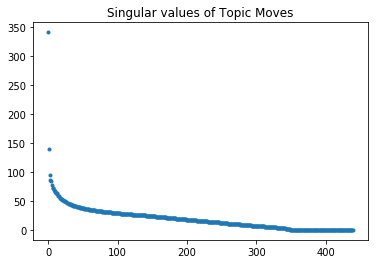

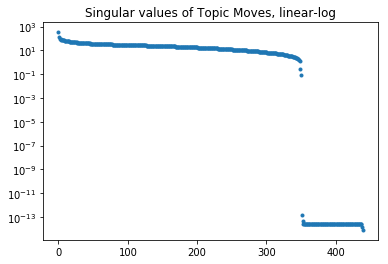

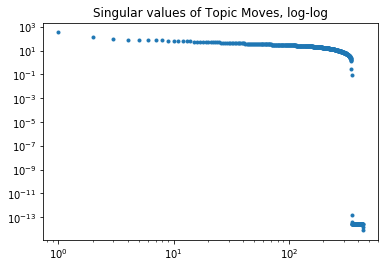

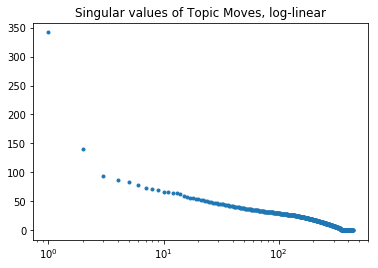

In [169]:
plt.plot(range(len(mts)), mts, '.')
plt.title('Singular values of Topic Moves')
plt.show()

plt.plot(range(len(mts)), mts, '.')
plt.title('Singular values of Topic Moves, linear-log')
plt.yscale('log')
plt.show()

plt.plot(range(1,len(mts)+1), mts, '.')
plt.title('Singular values of Topic Moves, log-log')
plt.yscale('log')
plt.xscale('log')
plt.show()

plt.plot(range(1,len(mts)+1), mts, '.')
plt.title('Singular values of Topic Moves, log-linear')
plt.xscale('log')
plt.show()

In [374]:
lda2 = LDA(80)
lda2.fit(movemat)
doc_topics2 = lda2.transform(movemat)
topic_words2 = lda2.components_
normalized_topics2 = topic_words2.copy()
normalized_topics2 = normalized_topics2 / np.sum(normalized_topics2,0)
variance_topics2 = np.linalg.norm(normalized_topics2 - np.eye(len(normalized_topics2))[:,:,np.newaxis],axis=1)**2
confidence_topics2 = normalized_topics2 - ttest_ci(variance_topics2, movemat.sum(0), 0.8)

In [375]:
# Now the even better way
for t,topic in enumerate(confidence_topics2):
    print('Topic ', t)
    for j in np.argsort(-topic)[:10]:
        if j < len(fieldlist):
            print('\t Field ', fieldlist[j], ': ', topic[j])
        else:
            print('\t Word ',wordlist[j-len(fieldlist)],': ', topic[j])
    print('')

Topic  0
	 Word  the :  -0.029609291767278303
	 Word  if :  -0.0505838809759802
	 Word  is :  -0.05229602803580184
	 Field  priority: 0 :  -0.052607987169699916
	 Field  flags: protect; 1 :  -0.05795279757782686
	 Field  flags: mirror; 1 :  -0.0580714239881836
	 Field  secondary:  :  -0.05872688618086487
	 Word  a :  -0.05974151848272325
	 Word  to :  -0.06187004090114302
	 Field  target: normal :  -0.06269874886279923

Topic  1
	 Word  transforms :  0.7218547046448935
	 Field  condition: onFieldResidualSubOrder; 7 :  0.6397523733706645
	 Word  camouflage :  0.6397523733706645
	 Field  condition: onBasePowerPriority; 6 :  0.6397523733706645
	 Word  do :  0.6397523733706414
	 Word  multiplied :  0.5439175268921004
	 Word  13 :  0.4826658567857896
	 Word  wake :  0.4826658567857655
	 Word  becomes :  0.4442037219837809
	 Word  grounded :  0.4218552033721379

Topic  2
	 Field  flags: pulse; 1 :  0.8089669095486057
	 Field  basePower: 110 :  0.7305249274302159
	 Field  type: Water :  0.505

	 Field  target: allAdjacentFoes :  0.2069884622780641
	 Word  lower :  0.04224279663626421
	 Word  stage :  0.009950570116113777

Topic  31
	 Word  band :  0.8707172689193623
	 Word  claw :  0.8707172689193623
	 Word  grip :  0.8707172689193623
	 Word  seven :  0.8707172689193623
	 Field  volatileStatus: partiallytrapped :  0.8707172689193623
	 Word  binding :  0.7812662656130502
	 Word  perish :  0.773392928146302
	 Word  1/6 :  0.7573775924230388
	 Word  2/3 :  0.7218547046444957
	 Word  mega :  0.6972677558694158

Topic  32
	 Word  remain :  0.8939522486787608
	 Word  replacement :  0.7831521225795695
	 Word  baton :  0.6038315822025602
	 Word  pass :  0.5870567251329084
	 Word  leaves :  0.35085589556586516
	 Word  trapped :  0.29206103836609115
	 Word  switching :  0.27285196073039586
	 Word  shot :  0.2494859189199548
	 Word  u-turn :  0.2494859188318508
	 Word  parting :  0.24948591877529677

Topic  33
	 Field  secondary: boosts; atk; -1 :  0.7218547046448858
	 Field  basePower

	 Word  skill :  0.9272400802990557
	 Word  link :  0.9272400801886631
	 Field  multihit: 5 :  0.9167120006073396
	 Word  35% :  0.9167120006073396
	 Word  15% :  0.9167120006073396
	 Word  five :  0.7573541047969012
	 Word  remaining :  0.7106019442556696
	 Word  always :  0.7090679551469837
	 Word  two :  0.5755083631655974

Topic  59
	 Field  flags: charge; 1 :  0.8908124440928653
	 Word  completes :  0.8908124438017755
	 Word  executes :  0.8908124414220175
	 Word  charges :  0.8908124295839153
	 Word  herb :  0.890812415673365
	 Word  gust :  0.6397523733706646
	 Word  twister :  0.6397523733706646
	 Field  boosts: def; 2 :  0.4826658567851402
	 Word  first :  0.38034769872012003
	 Word  on :  0.3530223711998872

Topic  60
	 Word  3 :  0.8549814079781481
	 Word  120 :  0.8350428055250911
	 Word  60 :  0.7733929281463319
	 Word  depends :  0.6813020730907775
	 Word  40 :  0.5097600160761138
	 Word  result :  0.4826658567858022
	 Word  80 :  0.46774290929236984
	 Word  both :  0.413

In [376]:
# Listing moves for each topic
for t,topic in enumerate(normalized_topics2):
    print('Topic ', t)
    for doc in np.argsort(-doc_topics2[:,t])[:10]:
        print('\t', movelist[doc],': ', doc_topics2[doc,t])
    print()

Topic  0
	 celebrate :  0.0009615384615384915
	 splash :  0.0008928571428571789
	 glaciallance :  0.0008928571428571775
	 astralbarrage :  0.0008928571428571586
	 powergem :  0.0008333333333333542
	 rockthrow :  0.0008333333333333536
	 branchpoke :  0.0008333333333333517
	 leafage :  0.0008333333333333514
	 petalblizzard :  0.0008333333333333488
	 iceshard :  0.0008333333333333465

Topic  1
	 electricterrain :  0.989713541666666
	 mistyterrain :  0.6566581834672439
	 psychicterrain :  0.6124954435781504
	 grassyterrain :  0.5797208711719656
	 stompingtantrum :  0.4826092286986196
	 sunnyday :  0.2739304341073967
	 raindance :  0.26985776179341747
	 uproar :  0.2593567868574364
	 echoedvoice :  0.17813157657504375
	 gravapple :  0.13696463666897962

Topic  2
	 originpulse :  0.7480723144332972
	 hydropump :  0.3330279411583897
	 dazzlinggleam :  0.271724126233546
	 dragonpulse :  0.25054702147897334
	 waterpulse :  0.17631127596447885
	 astralbarrage :  0.17456425293592212
	 landswrath 


Topic  31
	 clamp :  0.9921626984121977
	 bind :  0.9920999999999996
	 wrap :  0.9920999999999996
	 snaptrap :  0.9920362903225803
	 firespin :  0.9920362903225803
	 magmastorm :  0.9920362903225802
	 thundercage :  0.9919715447154465
	 sandtomb :  0.9878172400968391
	 infestation :  0.9841000000000003
	 whirlpool :  0.968993123057417

Topic  32
	 meanlook :  0.930463604779001
	 spiritshackle :  0.9038848822186334
	 thousandwaves :  0.8908219823040779
	 block :  0.87327898946473
	 anchorshot :  0.8486765949148671
	 octolock :  0.7055780973350665
	 minimize :  0.6817761528574521
	 jawlock :  0.6161626794275212
	 fairylock :  0.5998643761373336
	 powertrick :  0.5355059576375995

Topic  33
	 grassyterrain :  0.17227470280915488
	 snore :  0.08779003084047947
	 acidspray :  0.07708827377240945
	 cut :  0.06328124999999893
	 rockthrow :  0.06170046449723242
	 playrough :  0.05313258367099126
	 tropkick :  0.049777347558906664
	 clearsmog :  0.04861532565743005
	 confusion :  0.04821976181

	 boomburst :  0.06420859589880154
	 freezeshock :  0.025690694938457753
	 iceburn :  0.0251052718228011
	 skyattack :  0.02089033412641252
	 endure :  0.013909351614747156
	 celebrate :  0.0009615384615384915
	 splash :  0.0008928571428571789



In [379]:
print(doc_topics2[0].sum())
normalized_doctopics2 = doc_topics2 / doc_topics2.sum(0)
print(normalized_doctopics2[0].sum())

0.9999999999999999
0.2038377290015012


In [381]:
# Listing moves for each topic
for t,topic in enumerate(normalized_doctopics2):
    print('Topic ', t)
    for doc in np.argsort(-normalized_doctopics2[:,t])[:10]:
        print('\t', movelist[doc],': ', normalized_doctopics2[doc,t])
    print()

Topic  0
	 celebrate :  0.0035844562942972838
	 splash :  0.0033284237018475086
	 glaciallance :  0.0033284237018475034
	 astralbarrage :  0.0033284237018474327
	 powergem :  0.00310652878839096
	 rockthrow :  0.003106528788390958
	 branchpoke :  0.003106528788390951
	 leafage :  0.0031065287883909496
	 petalblizzard :  0.00310652878839094
	 iceshard :  0.0031065287883909314

Topic  1
	 electricterrain :  0.19551759325842888
	 mistyterrain :  0.12972261388761347
	 psychicterrain :  0.12099827876305508
	 grassyterrain :  0.11452367247835135
	 stompingtantrum :  0.09533929860206017
	 sunnyday :  0.054114869547731384
	 raindance :  0.053310314436139664
	 uproar :  0.05123585019985907
	 echoedvoice :  0.035189835916190834
	 gravapple :  0.02705732011905034

Topic  2
	 originpulse :  0.09687031309778976
	 hydropump :  0.04312486949174759
	 dazzlinggleam :  0.035186439434544775
	 dragonpulse :  0.03244414737467325
	 waterpulse :  0.02283111963351877
	 astralbarrage :  0.02260489194870792
	 l

	 snore :  0.061877853597960455
	 acidspray :  0.05433483589128894
	 cut :  0.04460310453827018
	 rockthrow :  0.043488904976275465
	 playrough :  0.03744992685614855
	 tropkick :  0.03508502497671521
	 clearsmog :  0.03426598640925136
	 confusion :  0.03398717751068173
	 lunge :  0.03303031850148405

Topic  34
	 bulldoze :  0.0690530041311373
	 earthquake :  0.05918453397896342
	 precipiceblades :  0.05658623927872513
	 landswrath :  0.053596782300520875
	 risingvoltage :  0.050000716253645036
	 surf :  0.03281853518679909
	 earthpower :  0.03163293888022089
	 brutalswing :  0.031413791667541616
	 teeterdance :  0.030819885950471713
	 petalblizzard :  0.028671020748461687

Topic  35
	 assurance :  0.366896275542775
	 vinewhip :  0.06477456376679137
	 smokescreen :  0.052682986225257716
	 kinesis :  0.05229218741766826
	 sandattack :  0.04987395269013794
	 flash :  0.04759192425041503
	 watergun :  0.03476100813323738
	 hornattack :  0.03258844512490981
	 flamewheel :  0.03190669668351

	 celebrate :  0.0035844562942972838
	 splash :  0.0033284237018475086
	 glaciallance :  0.0033284237018475034
	 astralbarrage :  0.0033284237018474327
	 powergem :  0.00310652878839096
	 rockthrow :  0.003106528788390958
	 branchpoke :  0.003106528788390951
	 leafage :  0.0031065287883909496
	 petalblizzard :  0.00310652878839094
	 iceshard :  0.0031065287883909314

Topic  58
	 cometpunch :  0.06796955610012737
	 doubleslap :  0.06794471026497868
	 furyswipes :  0.0670011975378137
	 barrage :  0.06322821545949651
	 furyattack :  0.0630343734207131
	 armthrust :  0.06285291414523175
	 tailslap :  0.06251687144063918
	 spikecannon :  0.06217456550514267
	 bonerush :  0.0580859640611996
	 iciclespear :  0.058046305993866176

Topic  59
	 fly :  0.08531916068703882
	 bounce :  0.07303768880295786
	 dive :  0.07278209246034689
	 dig :  0.06367441060771448
	 meteorbeam :  0.061040458795870826
	 skullbash :  0.06006754300394686
	 freezeshock :  0.05638109372083862
	 geomancy :  0.055883322729

IndexError: index 80 is out of bounds for axis 1 with size 80

In [391]:
movename = 'flamethrower'
nearbymoves = np.argsort( np.linalg.norm(doc_topics2 - doc_topics2[movelist.index(movename)], axis=1) / np.linalg.norm(doc_topics2, axis=1))[:10]
for m in nearbymoves:
    print(movelist[m])

flamethrower
heatwave
lusterpurge
psychic
energyball
earthpower
mistball
bugbuzz
acid
fireblast


In [392]:
movename = 'flamethrower'
nearbymoves = np.argsort( np.linalg.norm(doc_topics - doc_topics[movelist.index(movename)], axis=1) / np.linalg.norm(doc_topics, axis=1))[:10]
for m in nearbymoves:
    print(movelist[m])

fireblast
firepunch
flamewheel
pyroball
ember
flamethrower
heatwave
dynamicpunch
inferno
strangesteam


In [170]:
mts

array([3.41723411e+02, 1.40487878e+02, 9.43195519e+01, 8.68939749e+01,
       8.37286568e+01, 7.84711053e+01, 7.30695899e+01, 7.19410488e+01,
       6.94859994e+01, 6.64396854e+01, 6.54495154e+01, 6.38266941e+01,
       6.34534332e+01, 6.15807032e+01, 5.86901025e+01, 5.78713323e+01,
       5.54543483e+01, 5.48446934e+01, 5.41812139e+01, 5.29632148e+01,
       5.20211516e+01, 5.13931139e+01, 5.05377528e+01, 5.02618442e+01,
       4.93894126e+01, 4.79243850e+01, 4.75091831e+01, 4.67020091e+01,
       4.63650533e+01, 4.53512766e+01, 4.52020462e+01, 4.49044388e+01,
       4.43771762e+01, 4.36192815e+01, 4.28132595e+01, 4.26001423e+01,
       4.18986710e+01, 4.17160972e+01, 4.12620454e+01, 4.08283288e+01,
       4.07555988e+01, 3.99815384e+01, 3.98417099e+01, 3.96089182e+01,
       3.91663383e+01, 3.88636870e+01, 3.83375157e+01, 3.81783160e+01,
       3.81079745e+01, 3.75141132e+01, 3.73108673e+01, 3.71063521e+01,
       3.69041918e+01, 3.67936562e+01, 3.64528265e+01, 3.61286441e+01,
      

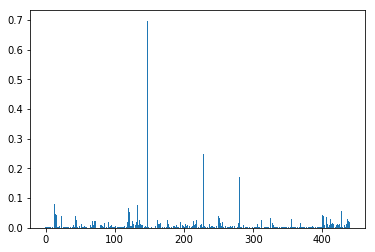

In [172]:
plt.bar(range(len(mtvt[0])),mtvt[0])
plt.show()

In [213]:
with open('gen8vgc2021series9-1760.json') as file:
    vgc_high = json.load(file)


In [226]:
vgclist = list(vgc_high['data'])

In [230]:
[ p for p in vgclist if re.sub(r'[\'-. ]','',p.lower()) not in pokelist]

[]

In [231]:
vgclookup = { p: re.sub('[\'-. ]','',p.lower()) for p in vgclist}

In [233]:
viability_data = [ (pokelist.index(re.sub('[\'-. ]','',p.lower())), vgc_high['data'][p]['Viability Ceiling'][1]) for p in vgclist]

In [234]:
np.var([x[1] for x in viability_data])

30.49177816055119

In [235]:
np.random.shuffle(viability_data)

In [236]:
viability_data[0]

(543, 69)

In [237]:
pokelist[543]

'noivern'

In [238]:
vgc_high['data']['Noivern']['Viability Ceiling']

[250, 69, 67, 54]

In [342]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from lightgbm import LGBMRegressor

In [329]:
def test_model(model, X, y, test_pct=0.1):
    test_idx = int(test_pct * len(X))
    model.fit(X[test_idx:], y[test_idx:])
    return r2_score(y[:test_idx], model.predict(X[:test_idx]))

In [348]:
viability_mat = pokemat[ [x[0] for x in viability_data]]
viability_pca = pokemat_pca[ [x[0] for x in viability_data]]
viability_y = np.array([x[1] for x in viability_data])

In [350]:
print('Linear Regression: r^2=', test_model(LinearRegression(), viability_mat, viability_y))
print('Ridge Regression: r^2=', test_model(Ridge(), viability_mat, viability_y))
print('Random Forest Regression: r^2=', test_model(RandomForestRegressor(20), viability_mat, viability_y))
print('KNN Regression: r^2=', test_model(KNeighborsRegressor(), viability_mat, viability_y))
# print('Linear Regression: r^2=', 1-test_model(LinearRegression(), viability_mat, viability_y))
print('Big Ridge Regression: r^2=', test_model(Ridge(1e22), viability_mat, viability_y))
print('LGBM Regression: r^2=', test_model(LGBMRegressor(), viability_mat, viability_y))

Linear Regression: r^2= -0.22719445341324218
Ridge Regression: r^2= -0.14147267735595315
Random Forest Regression: r^2= -0.07097248484058172
KNN Regression: r^2= 0.053243789528590546
Big Ridge Regression: r^2= -0.0031086102839472662
LGBM Regression: r^2= 0.1972990474999079


In [351]:
print('Standardized Linear Regression: r^2=', test_model(LinearRegression(), viability_pca, viability_y))
print('Standardized Ridge Regression: r^2=', test_model(Ridge(), viability_pca, viability_y))
print('Standardized Random Forest Regression: r^2=', test_model(RandomForestRegressor(20), viability_pca, viability_y))
print('Standardized KNN Regression: r^2=', test_model(KNeighborsRegressor(), viability_pca, viability_y))
# print('Linear Regression: r^2=', 1-test_model(LinearRegression(), viability_mat, viability_y))
print('Standardized Big Ridge Regression: r^2=', test_model(Ridge(1e8), viability_pca, viability_y))
print('Standardized LGBM Regression: r^2=', test_model(LGBMRegressor(), viability_pca, viability_y))

Standardized Linear Regression: r^2= -0.46434955670995737
Standardized Ridge Regression: r^2= -0.441934360518367
Standardized Random Forest Regression: r^2= 0.0823574525656906
Standardized KNN Regression: r^2= 0.07620525526504496
Standardized Big Ridge Regression: r^2= -0.0031019818873485594
Standardized LGBM Regression: r^2= 0.19161840431528587


In [352]:
viability_pca.shape
u,s,vt = np.linalg.svd(viability_pca, full_matrices=False)
pca_idx = np.argmax( np.cumsum(s**2)/(s**2).sum() > 0.95)
viability_lowdim = (u[:,:pca_idx] * s[:pca_idx]) @ vt[:pca_idx]


In [353]:
print('PCA Linear Regression: r^2=', test_model(LinearRegression(), viability_lowdim, viability_y))
print('PCA Ridge Regression: r^2=', test_model(Ridge(), viability_lowdim, viability_y))
print('PCA Random Forest Regression: r^2=', test_model(RandomForestRegressor(20), viability_lowdim, viability_y))
print('PCA KNN Regression: r^2=', test_model(KNeighborsRegressor(), viability_lowdim, viability_y))
# print('Linear Regression: r^2=', 1-test_model(LinearRegression(), viability_mat, viability_y))
print('PCA Big Ridge Regression: r^2=', test_model(Ridge(1e8), viability_lowdim, viability_y))
print('PCA LGBM Regression: r^2=', test_model(LGBMRegressor(), viability_lowdim, viability_y))

PCA Linear Regression: r^2= -2.077488084859398
PCA Ridge Regression: r^2= -2.03856949856882
PCA Random Forest Regression: r^2= -0.12323205320466868
PCA KNN Regression: r^2= 0.035416313490252205
PCA Big Ridge Regression: r^2= -0.0031015004544541203
PCA LGBM Regression: r^2= -0.14621653060449225


In [299]:

class MultiplicativelyPerturbedLeastSquares:
    def __init__(self, d, alpha=0, gamma=20, eta=4, include_linear=False, runs=1):
        self.A = None
        self.singular_values = None
        self.beta = None
        self.d = d
        self.alpha = alpha
        self.gamma = gamma
        self.eta = eta
        self.error = 0
        self.include_linear = include_linear
        self.runs = runs
        
    def fit(self, X, y):
        self.fit_A(X, y)
        
    def fit_A(self, X, y, noise=False):
        bestError = np.inf     
        N,D = X.shape
        M = int(max(self.d, np.power(D,self.alpha)) *self.gamma)
        M = min(N,M)
        
        full_affine = np.linalg.lstsq( np.hstack((X,np.ones((len(X),1)))), y, rcond=None)[0]
        resids = y - full_affine[-1] - X@full_affine[:-1]
        full_affine = full_affine[:-1]

        Xc = X - np.mean(X,axis=0)
        invcov = np.linalg.pinv( Xc.T @ Xc / len(Xc))

        for run in range(self.runs):
            full_W = np.zeros((M,D))
            print(full_W.shape)

            z_m = np.random.choice(N,M,replace=False)
            for m,z in enumerate(z_m):
                nms = np.linalg.norm(Xc-Xc[z], axis=1)**2
                k = np.log(self.eta) / np.median(nms)
                wts = np.exp(-k*nms)
                wts /= np.mean(wts)

                full_W[m] = invcov @ np.mean((wts-1) * resids * Xc.T, axis=1)

            if self.include_linear:
                full_W += full_affine / np.sqrt(len(full_W))

            u,s,vt = np.linalg.svd(full_W, full_matrices=False)

            svals = s
            ss = np.square(s)    
            if self.d < len(ss):
                error = (ss[self.d-1] - ss[self.d]) / ss[self.d-1]
            else:
                error = s.sum()/np.sqrt(ss.sum())
            if error < bestError:            
                self.A = vt[:self.d].T
                self.beta = full_affine
                self.singular_values = s


In [388]:
mpls = MultiplicativelyPerturbedLeastSquares(400)
test_idx = int(0.1 * len(viability_mat))
mpls.fit(viability_mat[test_idx:], viability_y[test_idx:])
mpls_idx = np.argmax( np.cumsum(mpls.singular_values**2)/(mpls.singular_values**2).sum() > 0.95)
print(mpls_idx)
viability_mpls = viability_mat @ (mpls.A[:,:mpls_idx] * mpls.singular_values[:mpls_idx])

(285, 934)
9


In [389]:
print('MPLS Linear Regression: r^2=', test_model(LinearRegression(), viability_mpls, viability_y))
print('MPLS Ridge Regression: r^2=', test_model(Ridge(), viability_mpls, viability_y))
print('MPLS Random Forest Regression: r^2=', test_model(RandomForestRegressor(20), viability_mpls, viability_y))
print('MPLS KNN Regression: r^2=', test_model(KNeighborsRegressor(), viability_mpls, viability_y))
# print('Linear Regression: r^2=', 1-test_model(LinearRegression(), viability_mat, viability_y))
print('MPLS Big Ridge Regression: r^2=', test_model(Ridge(1e8), viability_mpls, viability_y))
print('MPLS LGBM Regression: r^2=', test_model(LGBMRegressor(), viability_mpls, viability_y))

MPLS Linear Regression: r^2= 0.042493186650478854
MPLS Ridge Regression: r^2= -0.0031086102839472662
MPLS Random Forest Regression: r^2= -0.002273493834918039
MPLS KNN Regression: r^2= -0.11646084631935882
MPLS Big Ridge Regression: r^2= -0.0031086102839472662
MPLS LGBM Regression: r^2= 0.015224903109304022


In [334]:
for i in range(10,mpls.A.shape[1],10):
    viability_mpls = viability_mat @ mpls.A[:,:i]
    print('MPLS ', i)
    print('\tMPLS Linear Regression: r^2=', test_model(LinearRegression(), viability_mpls, viability_y))
    print('\tMPLS Ridge Regression: r^2=', test_model(Ridge(), viability_mpls, viability_y))
    print('\tMPLS Random Forest Regression: r^2=', test_model(RandomForestRegressor(20), viability_mpls, viability_y))
    print('\tMPLS KNN Regression: r^2=', test_model(KNeighborsRegressor(), viability_mpls, viability_y))
    # print('Linear Regression: r^2=', 1-test_model(LinearRegression(), viability_mat, viability_y))
    print('\tMPLS Big Ridge Regression: r^2=', test_model(Ridge(1e8), viability_mpls, viability_y))

MPLS  10
	MPLS Linear Regression: r^2= 0.048297335627463855
	MPLS Ridge Regression: r^2= 0.04879988897064946
	MPLS Random Forest Regression: r^2= 0.04632856816848163
	MPLS KNN Regression: r^2= 0.09573058616417796
	MPLS Big Ridge Regression: r^2= -0.0031085956823353467
MPLS  20
	MPLS Linear Regression: r^2= 0.06517261016352216
	MPLS Ridge Regression: r^2= 0.058440942396257856
	MPLS Random Forest Regression: r^2= -0.16926362717611032
	MPLS KNN Regression: r^2= -0.1755623655212888
	MPLS Big Ridge Regression: r^2= -0.0031085869207561068
MPLS  30
	MPLS Linear Regression: r^2= 0.046460731504029296
	MPLS Ridge Regression: r^2= 0.0405033340980101
	MPLS Random Forest Regression: r^2= 0.06426468670535324
	MPLS KNN Regression: r^2= -0.14132229249527284
	MPLS Big Ridge Regression: r^2= -0.0031085849298619905
MPLS  40
	MPLS Linear Regression: r^2= -0.09822858150118163
	MPLS Ridge Regression: r^2= -0.07111671013681997
	MPLS Random Forest Regression: r^2= -0.10556375105952953
	MPLS KNN Regression: r^

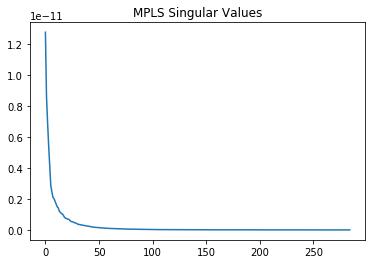

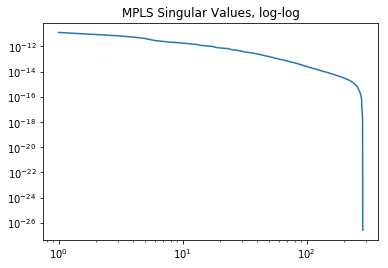

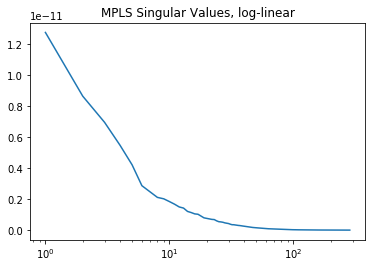

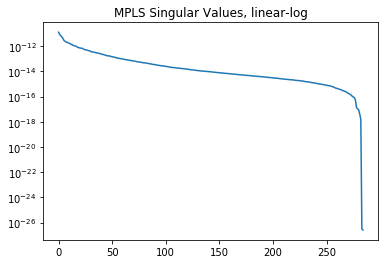

In [305]:
plt.title('MPLS Singular Values')
plt.plot(mpls.singular_values)
plt.show()

plt.title('MPLS Singular Values, log-log')
plt.plot(range(1,1+len(mpls.singular_values)), mpls.singular_values)
plt.yscale('log')
plt.xscale('log')
plt.show()

plt.title('MPLS Singular Values, log-linear')
plt.plot(range(1,1+len(mpls.singular_values)), mpls.singular_values)
# plt.yscale('log')
plt.xscale('log')
plt.show()

plt.title('MPLS Singular Values, linear-log')
plt.plot(mpls.singular_values)
plt.yscale('log')
# plt.xscale('log')
plt.show()

In [338]:
mpls.singular_values[:20]**2 / (mpls.singular_values**2).sum()

array([0.42977026, 0.19736851, 0.12774911, 0.07909094, 0.04691721,
       0.02170017, 0.01605281, 0.01178576, 0.01077793, 0.00896443,
       0.00739638, 0.00590239, 0.00534041, 0.00384308, 0.00338703,
       0.00289668, 0.00277048, 0.00218124, 0.00165825, 0.00151111])

In [339]:
plt.bar(range(len(mpls.A.shape[0])),mpls.A[:,0])

TypeError: object of type 'int' has no len()

In [310]:
print('Test pokemon')
for x in viability_data[:test_idx]:
    print(pokelist[x[0]], ', ', x[1])

Test pokemon
noivern ,  69
ludicolo ,  75
sylveon ,  77
persianalola ,  84
slowbro ,  73
terrakion ,  86
golduck ,  66
dragalge ,  71
heatran ,  86
kartana ,  82
sirfetchd ,  68
sandslashalola ,  69
jynx ,  79
tauros ,  72
escavalier ,  77
blaziken ,  74
swampert ,  80
klefki ,  69
bronzor ,  72
hydreigon ,  79
uxie ,  75
goodra ,  73
drifblim ,  76
virizion ,  78
gyarados ,  77
altaria ,  67
starmie ,  70
porygon2 ,  85
mrrime ,  71
lycanrocdusk ,  68
reuniclus ,  73


In [356]:
lgbm = LGBMRegressor()
lgbm.fit(viability_mat[test_idx:], viability_y[test_idx:])
yhats = lgbm.predict(viability_mat[:test_idx])

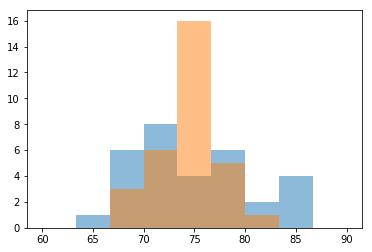

In [357]:
plt.hist(viability_y[:test_idx],np.linspace(60,90,10),alpha=0.5)
plt.hist(yhats,np.linspace(60,90,10),alpha=0.5)
plt.show()

In [358]:
print('Test pokemon')
for x,y in zip(viability_data[:test_idx], yhats):
    print(pokelist[x[0]], ', ', x[1], ', ', y)

Test pokemon
noivern ,  69 ,  75.62651896928654
ludicolo ,  75 ,  73.0638457129972
sylveon ,  77 ,  74.40870989327378
persianalola ,  84 ,  74.81649614649285
slowbro ,  73 ,  72.46769395206161
terrakion ,  86 ,  78.79971540012917
golduck ,  66 ,  76.29833244862941
dragalge ,  71 ,  74.98431260084035
heatran ,  86 ,  80.20636366375969
kartana ,  82 ,  73.6010694873264
sirfetchd ,  68 ,  69.49930842553007
sandslashalola ,  69 ,  67.17625793271488
jynx ,  79 ,  73.31425586383837
tauros ,  72 ,  69.74778525489201
escavalier ,  77 ,  77.43624516583134
blaziken ,  74 ,  73.16981557070228
swampert ,  80 ,  74.76511679225419
klefki ,  69 ,  75.83642187226711
bronzor ,  72 ,  72.618446297543
hydreigon ,  79 ,  76.02999544358678
uxie ,  75 ,  76.41287023310733
goodra ,  73 ,  74.27510574090535
drifblim ,  76 ,  76.77933815247074
virizion ,  78 ,  76.81247896396707
gyarados ,  77 ,  78.66252142853888
altaria ,  67 ,  74.43165709894377
starmie ,  70 ,  76.48516718590248
porygon2 ,  85 ,  75.234674

In [365]:
errors = [ (x[0],x[1],y) for x,y in zip(viability_data[:test_idx], yhats)]
print('pokemon, y, yhat, % of mse')
for x,y,z in sorted(errors, key=lambda x: -abs(x[1]-x[2])):
    print(pokelist[x], ', ', y, ', ', round(z,3), ', ', (y-z)**2 / np.square(viability_y[:test_idx] - yhats).sum())

pokemon, y, yhat, % of mse
golduck ,  66 ,  76.298 ,  0.13352768429747464
porygon2 ,  85 ,  75.235 ,  0.12006349585229731
persianalola ,  84 ,  74.816 ,  0.10618283766899271
kartana ,  82 ,  73.601 ,  0.08881482791905493
altaria ,  67 ,  74.432 ,  0.06953585963310609
terrakion ,  86 ,  78.8 ,  0.06527348909038366
klefki ,  69 ,  75.836 ,  0.05884305499856493
noivern ,  69 ,  75.627 ,  0.05528513740755568
starmie ,  70 ,  76.485 ,  0.05295169363860669
heatran ,  86 ,  80.206 ,  0.04226101902310417
jynx ,  79 ,  73.314 ,  0.040701660416131685
mrrime ,  71 ,  76.498 ,  0.03805654945807316
swampert ,  80 ,  74.765 ,  0.03450257399677773
dragalge ,  71 ,  74.984 ,  0.019986848113174457
lycanrocdusk ,  68 ,  71.548 ,  0.01584899653233311
hydreigon ,  79 ,  76.03 ,  0.011105848210679333
sylveon ,  77 ,  74.409 ,  0.008454142739709241
reuniclus ,  73 ,  75.514 ,  0.007954208459243436
tauros ,  72 ,  69.748 ,  0.006386414424406605
ludicolo ,  75 ,  73.064 ,  0.004719732952983732
sandslashalola 

In [324]:
np.var(viability_y[:test_idx])

31.91883454734651

In [325]:
np.square(viability_y[:test_idx] - yhats).sum()

992.5532320133073

In [326]:
np.square(viability_y[:test_idx] - np.mean(viability_y[:test_idx])).sum()

989.4838709677418

In [327]:
np.var(viability_y[:test_idx])

In [366]:
pokedex['pikachu']

{'abilities': {'0': 'Static', 'H': 'Lightning Rod'},
 'baseStats': {'atk': 55,
  'def': 40,
  'hp': 35,
  'spa': 50,
  'spd': 50,
  'spe': 90},
 'canGigantamax': 'G-Max Volt Crash',
 'color': 'Yellow',
 'eggGroups': ['Field', 'Fairy'],
 'evoType': 'levelFriendship',
 'evos': ['Raichu', 'Raichu-Alola'],
 'formeOrder': ['Pikachu',
  'Pikachu-Original',
  'Pikachu-Hoenn',
  'Pikachu-Sinnoh',
  'Pikachu-Unova',
  'Pikachu-Kalos',
  'Pikachu-Alola',
  'Pikachu-Partner',
  'Pikachu-Starter',
  'Pikachu-World',
  'Pikachu-Rock-Star',
  'Pikachu-Belle',
  'Pikachu-Pop-Star',
  'Pikachu-PhD',
  'Pikachu-Libre',
  'Pikachu-Cosplay'],
 'heightm': 0.4,
 'name': 'Pikachu',
 'num': 25,
 'otherFormes': ['Pikachu-Cosplay',
  'Pikachu-Rock-Star',
  'Pikachu-Belle',
  'Pikachu-Pop-Star',
  'Pikachu-PhD',
  'Pikachu-Libre',
  'Pikachu-Original',
  'Pikachu-Hoenn',
  'Pikachu-Sinnoh',
  'Pikachu-Unova',
  'Pikachu-Kalos',
  'Pikachu-Alola',
  'Pikachu-Partner',
  'Pikachu-Starter',
  'Pikachu-World'],
 'p